In [8]:
# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
# Import data
data = pd.read_csv('consolidatedCSV.csv')

In [14]:
# Drop date variable
data.drop(['QUANTITY'], axis=1)

ValueError: labels ['QUANTITY'] not contained in axis

In [11]:
data

DATE        PRICE   QUANTITY
0         1417412036   300.000000   0.010000
1         1417412423   300.000000   0.010000
2         1417415048   370.000000   0.010000
3         1417416612   370.000000   0.026556
4         1417498166   377.000000   0.010000
5         1417517949   377.875000   2.000000
6         1417518257   378.000000   4.900000
7         1417518340   378.000000   5.200000
8         1417545780   378.000000   0.100000
9         1417546703   378.000000   0.793600
10        1417550521   378.000000   0.010000
11        1417584956   377.900000   0.010000
12        1417585904   378.000000   0.066084
13        1417586889   378.000000   0.010524
14        1417631579   378.000000   0.350000
15        1417637186   377.010000   0.100000
16        1417647358   378.000000   0.010000
17        1417657685   377.100000   0.010000
18        1417830085   378.000000   0.015000
19        1418077586   375.005000   0.117500
20        1418179364   398.000000   0.010000
21        1418179389   360.500000   0.010000
22        1418355001   379.000000   0.050000
23        1418355193   364.990000   0.010000
24        1418355875   360.500000   0.990000
25        1418355878   360.000000   0.100000
26        1418355965   350.000000   2.000000
27        1418936217   342.500000   1.000000
28        1420680242   360.000000   0.010000
29        1420680441   271.840000   0.010000
...              ...          ...        ...
10156971  1518436125  8680.330000   0.043967
10156972  1518436129  8684.990000   0.100000
10156973  1518436147  8684.990000   0.153220
10156974  1518436149  8685.333333   0.433682
10156975  1518436150  8690.630000   0.025000
10156976  1518436167  8687.000000   0.049220
10156977  1518436168  8687.000000   0.053800
10156978  1518436180  8687.010000   0.100818
10156979  1518436187  8687.000000   0.475700
10156980  1518436208  8686.083333   0.856800
10156981  1518436226  8684.240000   0.001149
10156982  1518436229  8684.240000   0.178051
10156983  1518436232  8681.186000   0.059630
10156984  1518436248  8681.650000   0.012133
10156985  1518436263  8681.640000   1.000000
10156986  1518436265  8681.650000   0.001019
10156987  1518436266  8681.650000   0.315850
10156988  1518436281  8681.650000   0.836000
10156989  1518436287  8681.650000   0.022400
10156990  1518436307  8690.978667   0.124440
10156991  1518436325  8693.374000   0.143700
10156992  1518436340  8693.760000   0.018014
10156993  1518436341  8693.750000   0.011000
10156994  1518436342  8685.074000   0.005627
10156995  1518436346  8681.650000   0.035700
10156996  1518436358  8681.640000   0.004722
10156997  1518436379  8681.640000   0.002353
10156998  1518436381  8676.914000   0.148719
10156999  1518436391  8675.000000   0.005570
10157000  1518436394  8675.010000   0.507000

[10157001 rows x 3 columns]

In [6]:
# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

In [6]:
# Make data a np.array
data = data.values

In [7]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [8]:
# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [9]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [10]:
# Number of stocks in training data
n_stocks = X_train.shape[1]

In [11]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

In [12]:
# Session
net = tf.InteractiveSession()

In [13]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [14]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [15]:
# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

In [16]:
# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [17]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

In [18]:
# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [19]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [20]:
# Init
net.run(tf.global_variables_initializer())

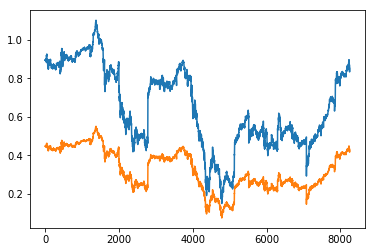

In [21]:
# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

In [22]:
# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

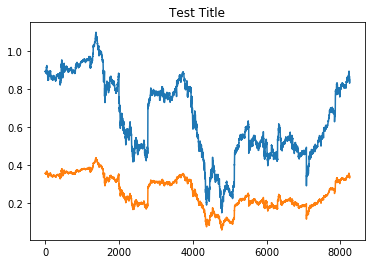

In [23]:
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title('Test Title')
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test *.4)
plt.show()

In [24]:
# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

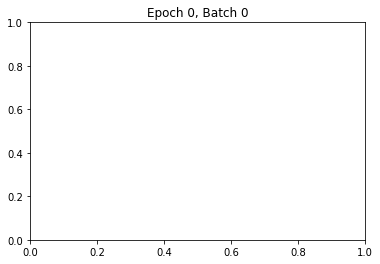

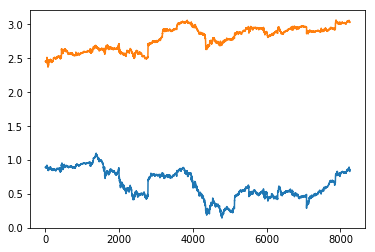

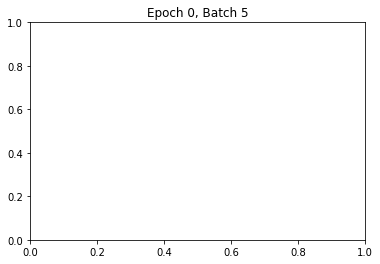

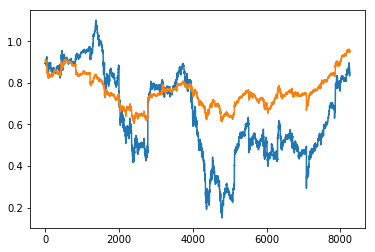

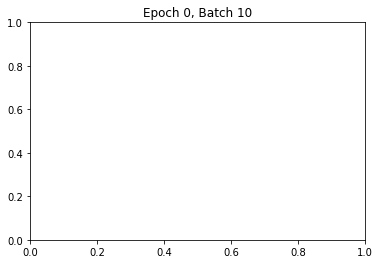

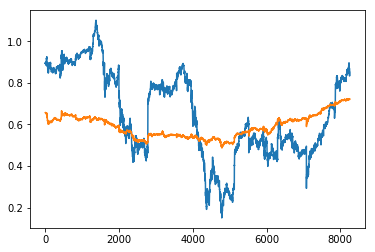

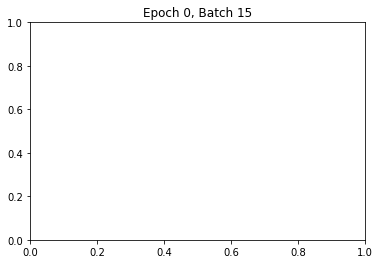

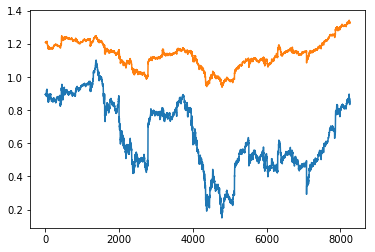

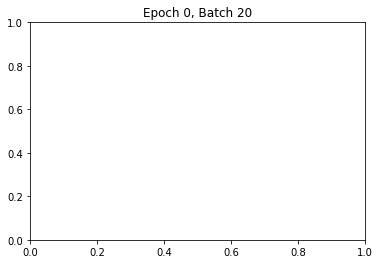

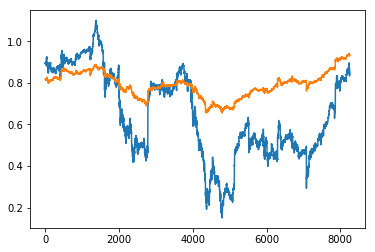

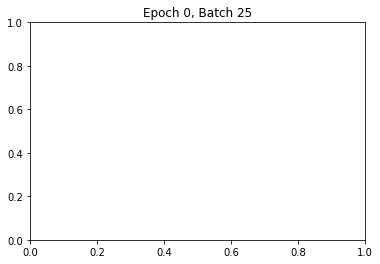

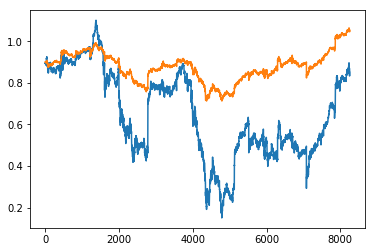

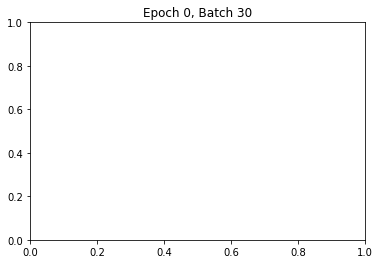

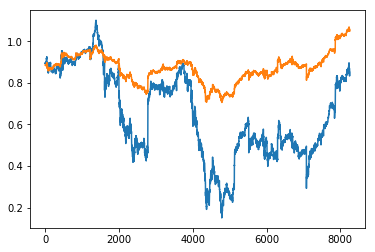

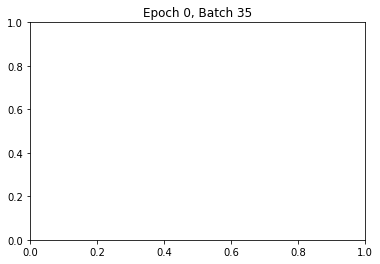

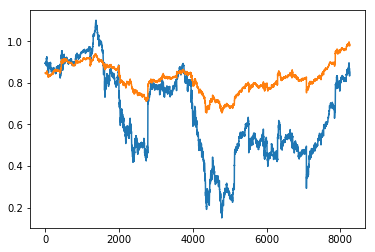

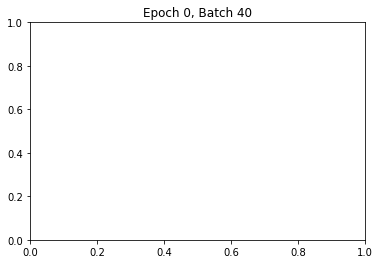

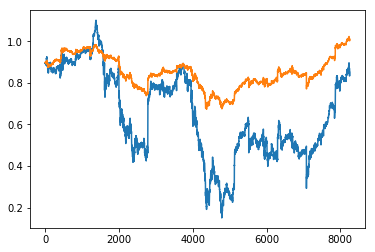

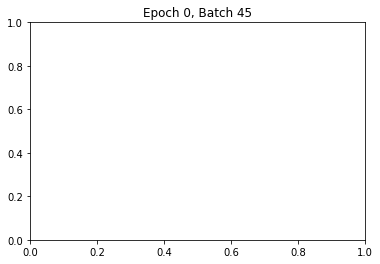

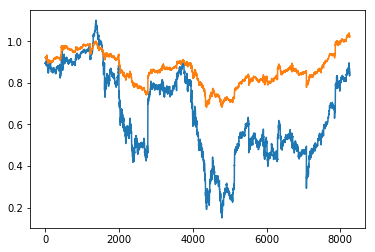

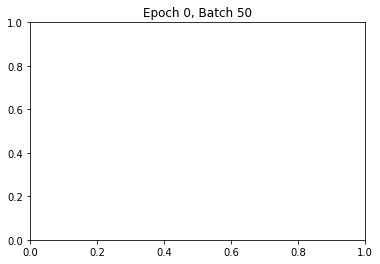

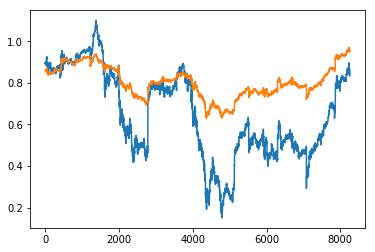

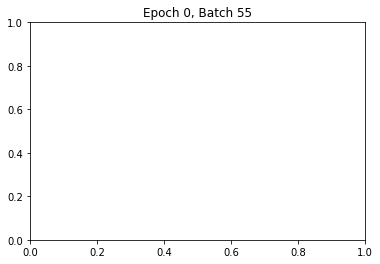

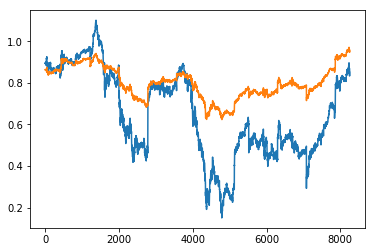

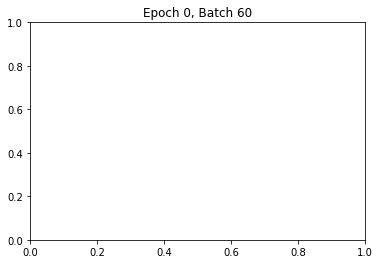

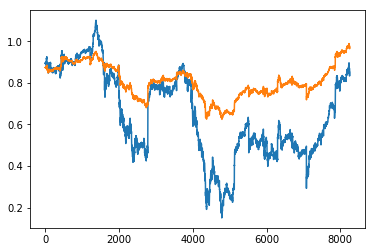

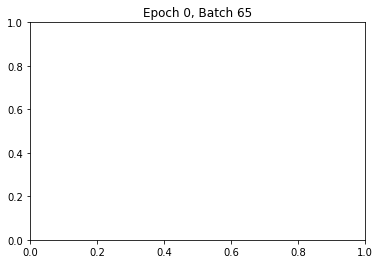

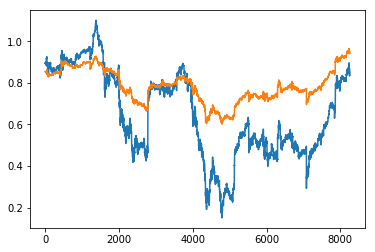

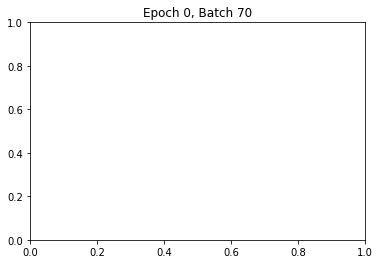

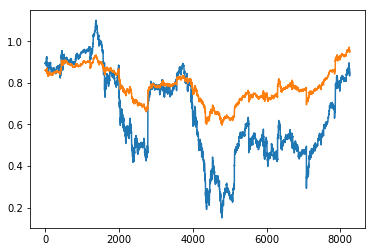

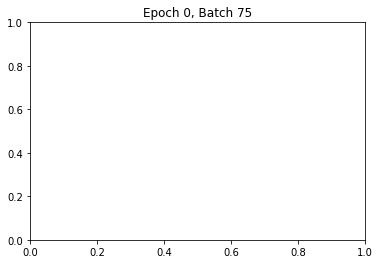

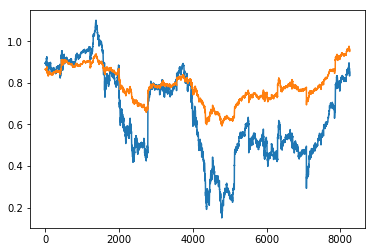

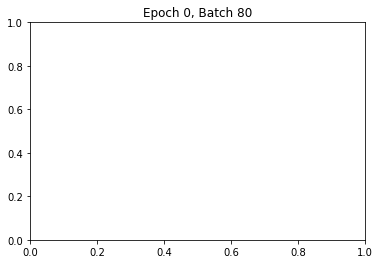

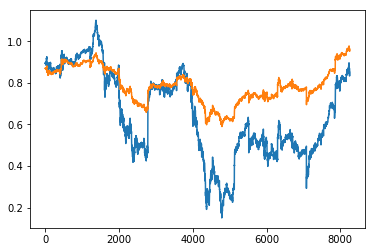

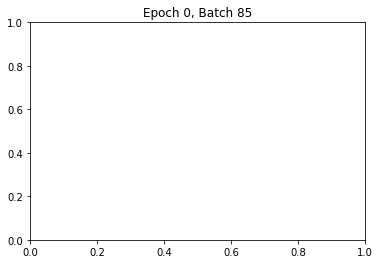

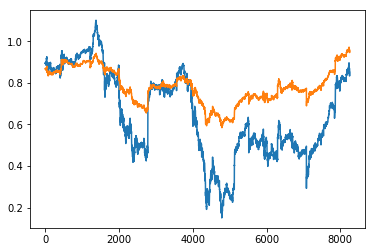

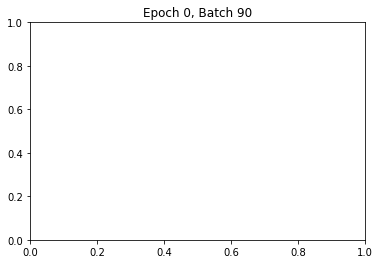

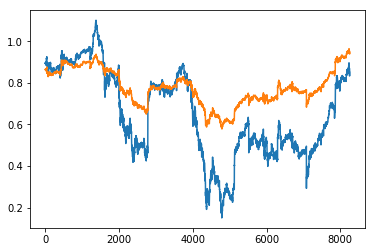

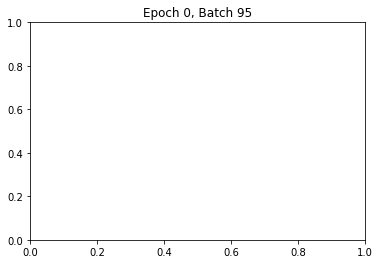

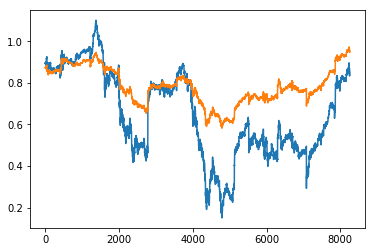

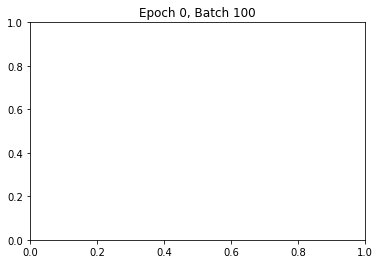

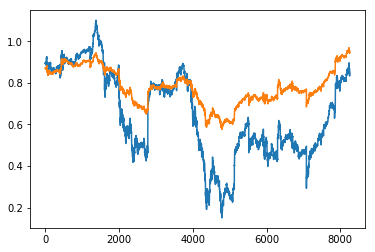

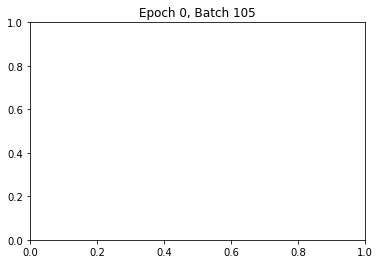

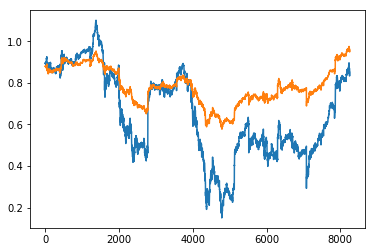

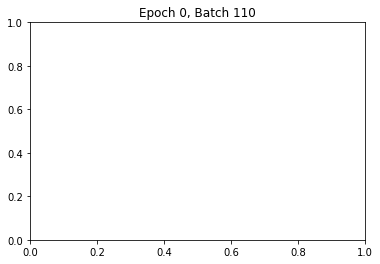

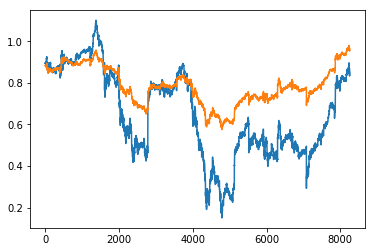

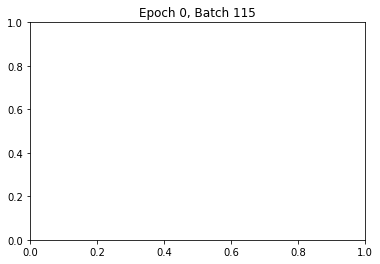

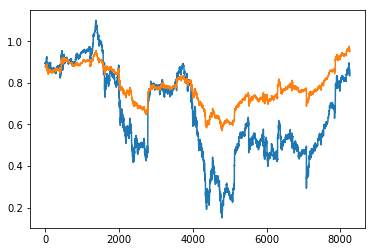

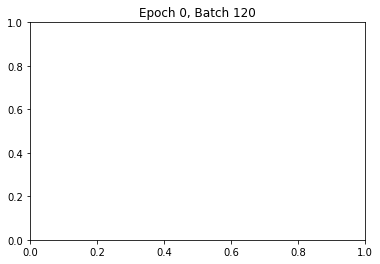

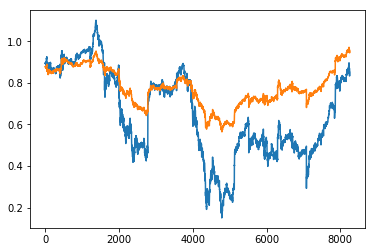

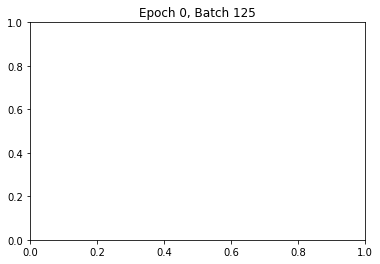

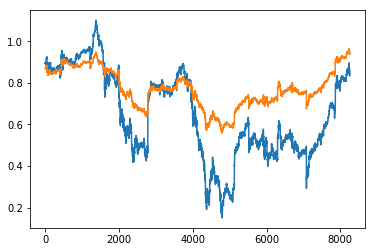

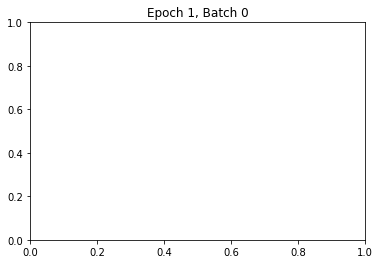

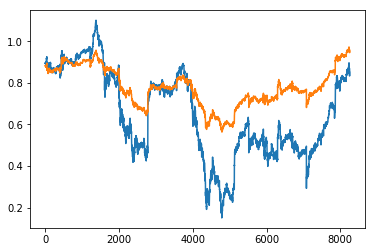

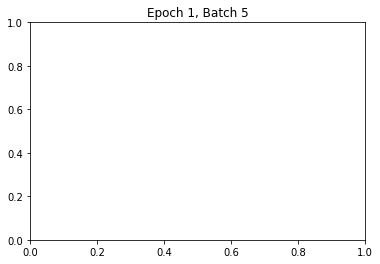

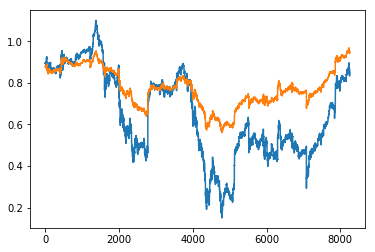

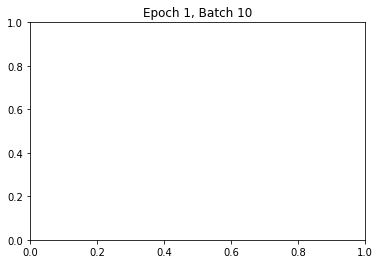

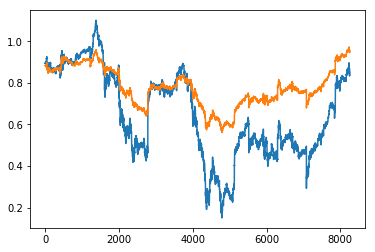

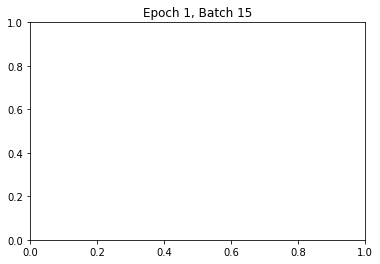

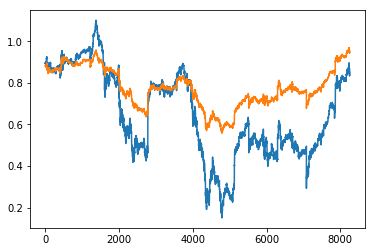

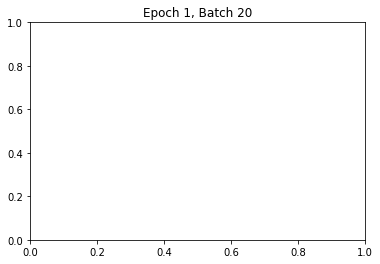

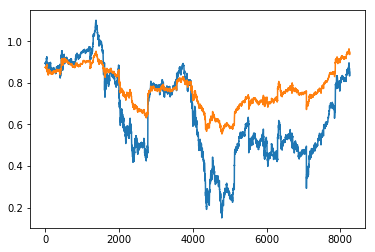

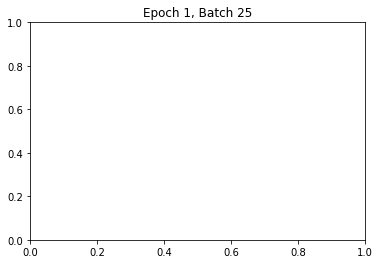

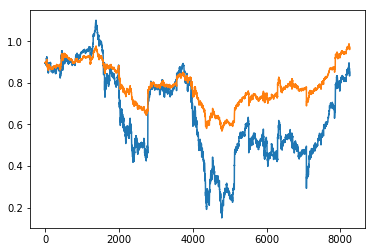

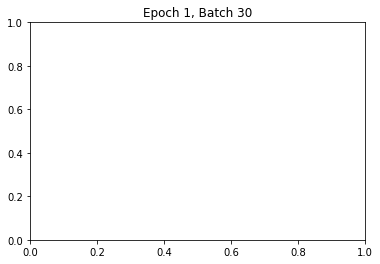

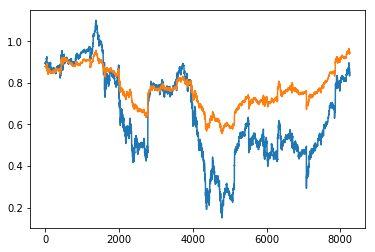

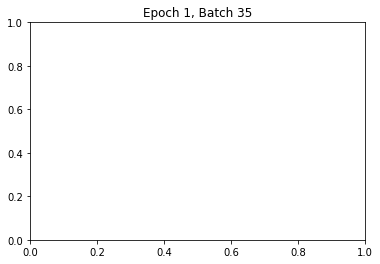

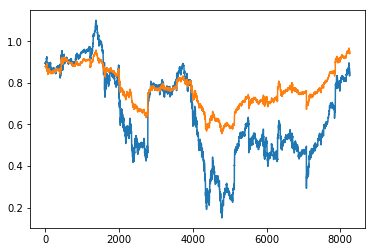

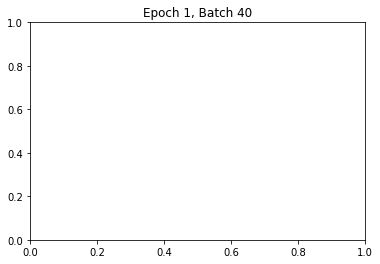

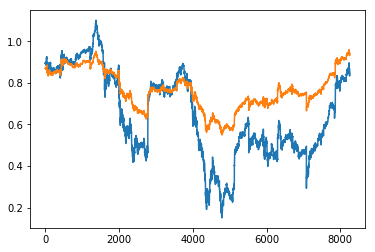

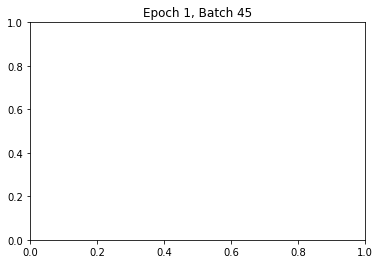

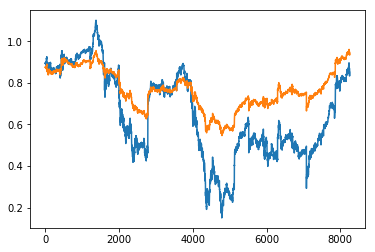

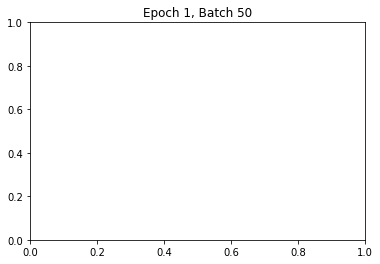

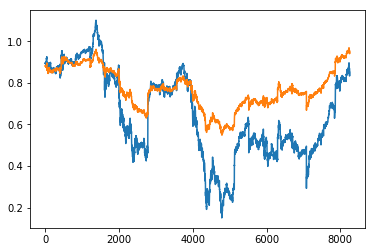

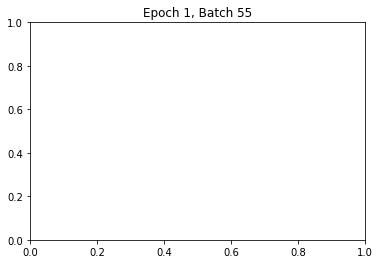

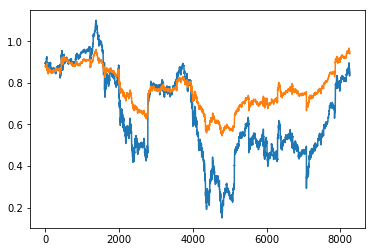

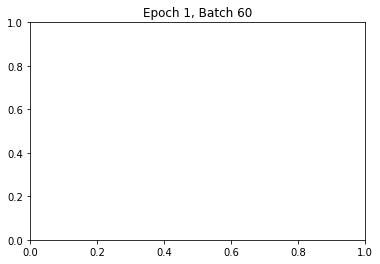

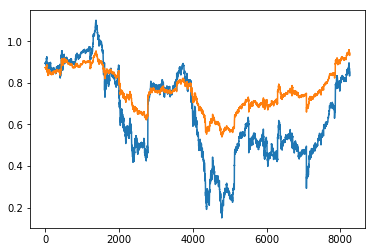

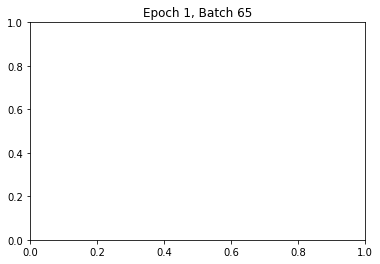

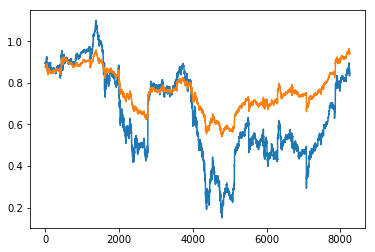

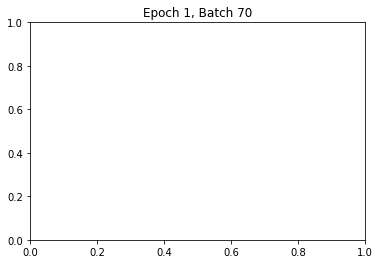

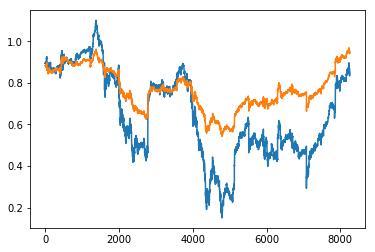

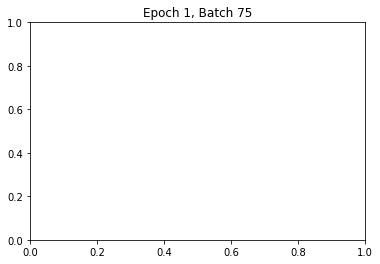

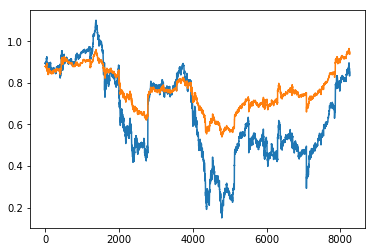

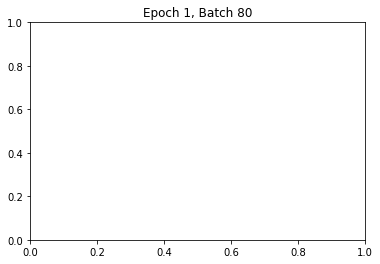

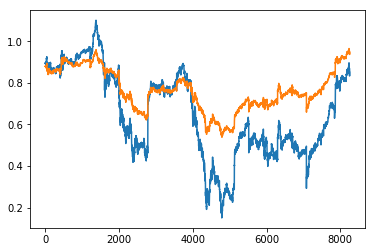

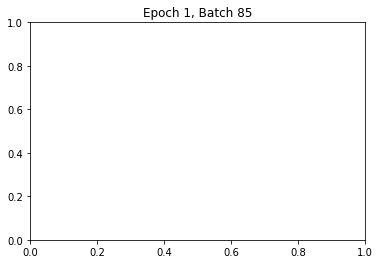

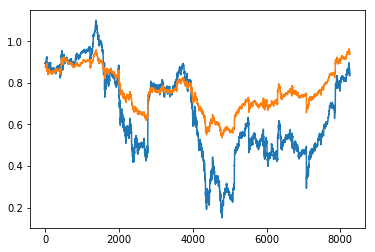

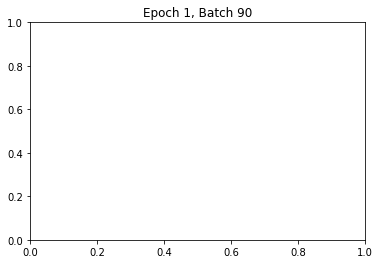

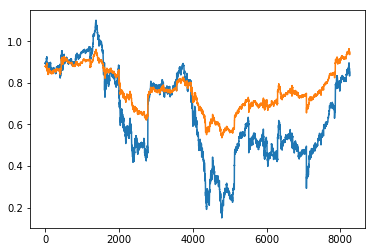

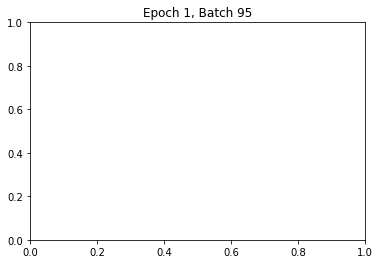

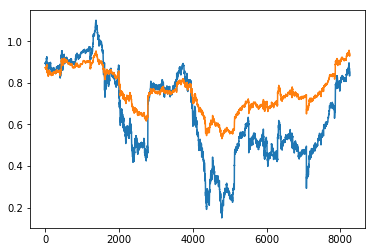

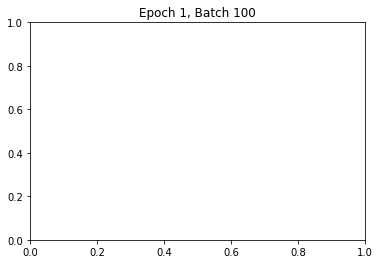

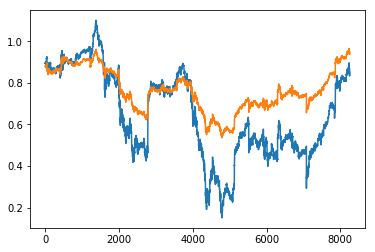

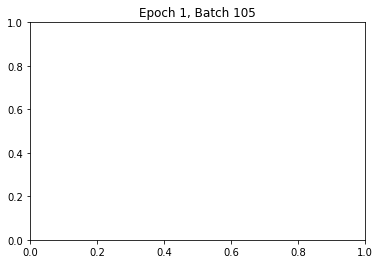

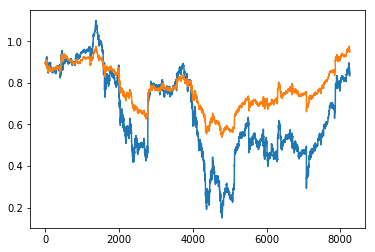

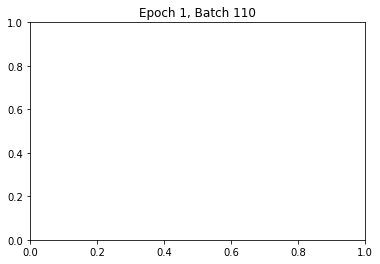

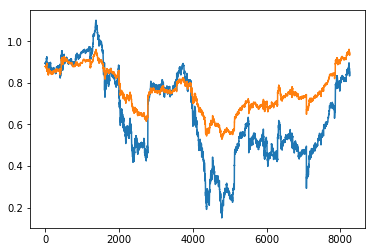

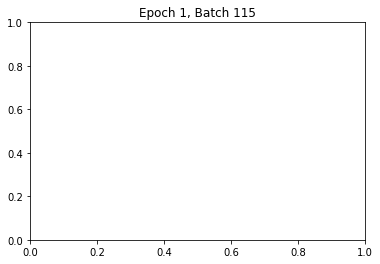

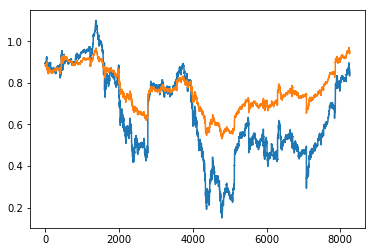

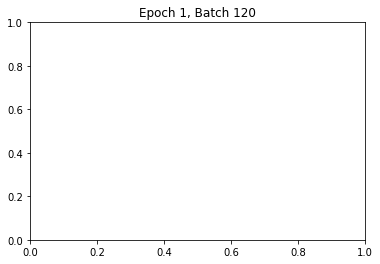

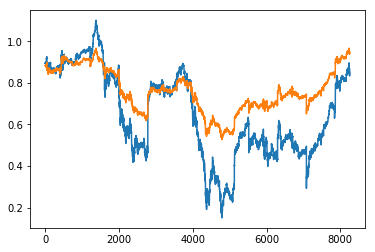

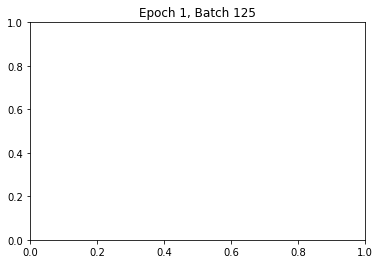

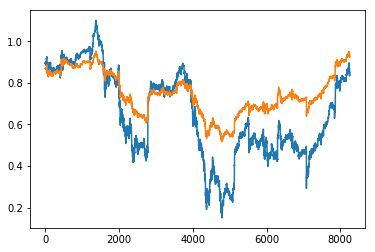

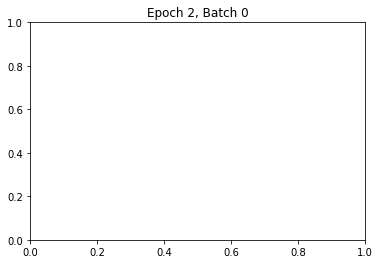

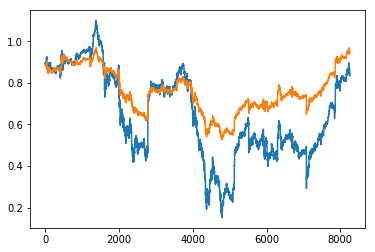

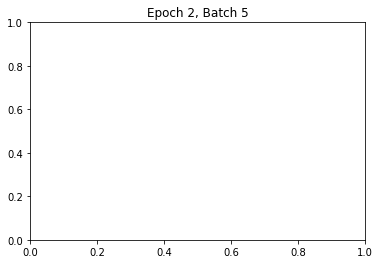

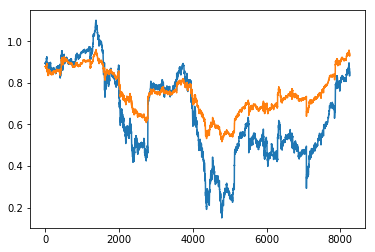

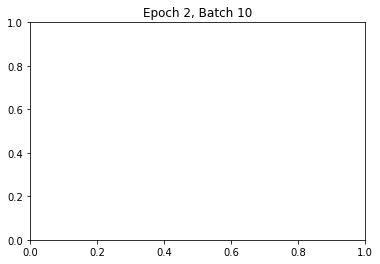

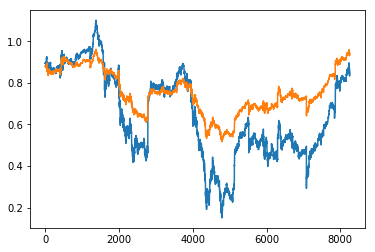

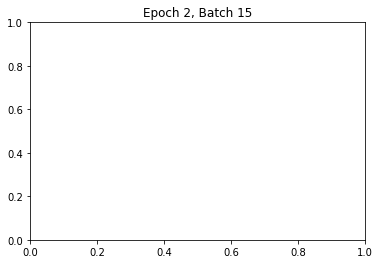

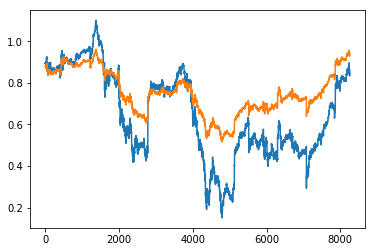

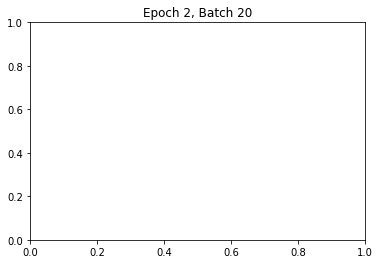

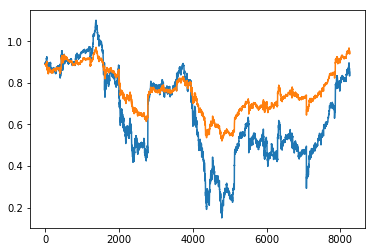

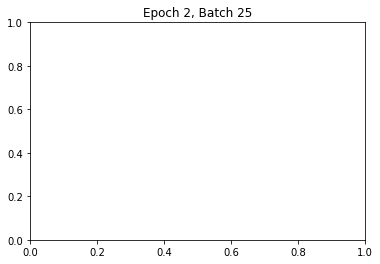

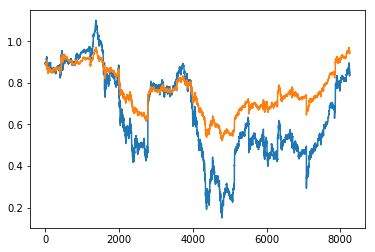

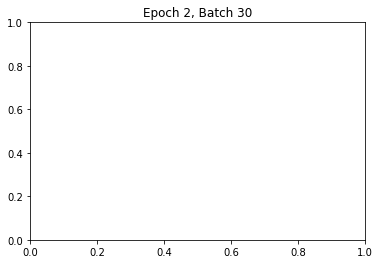

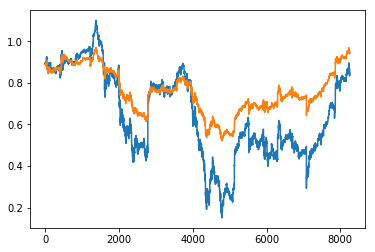

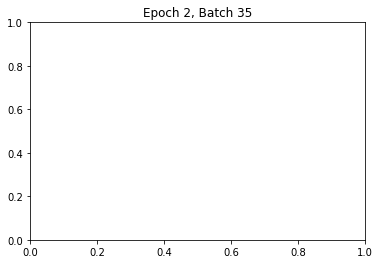

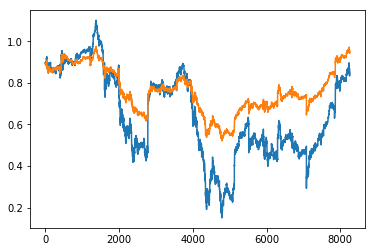

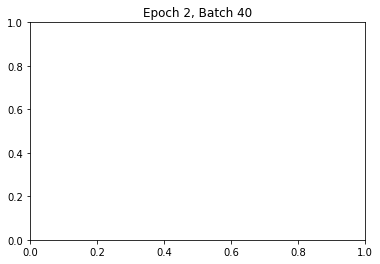

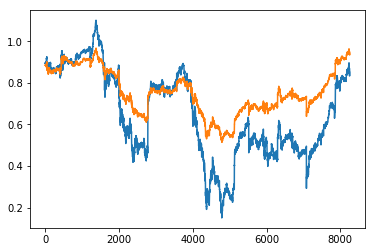

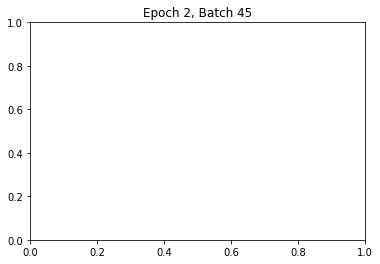

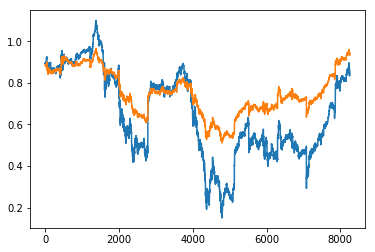

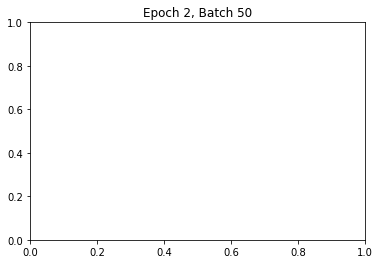

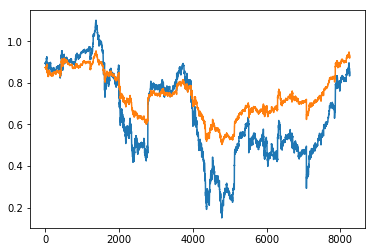

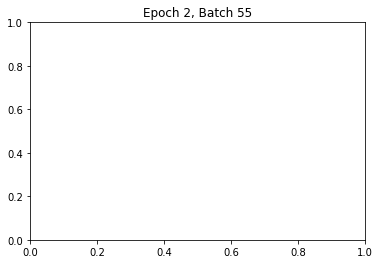

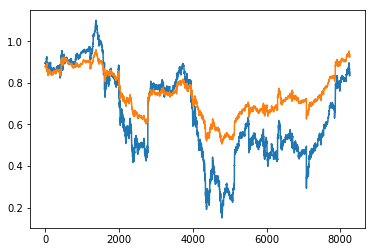

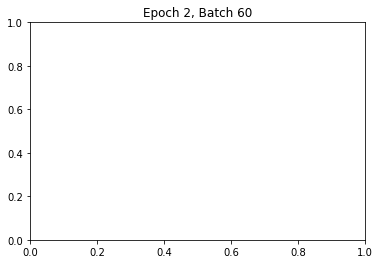

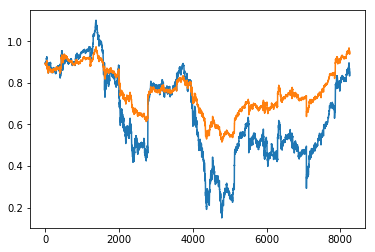

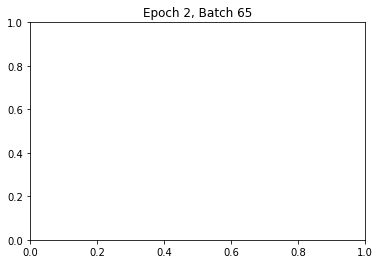

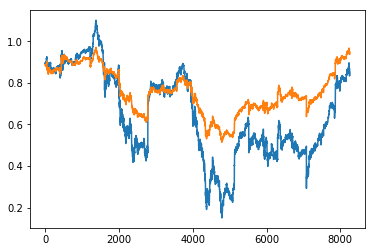

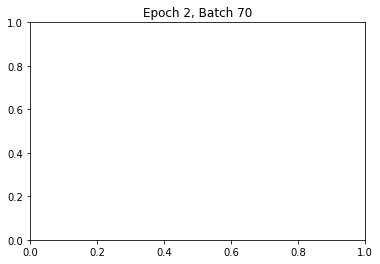

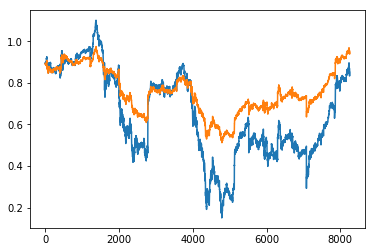

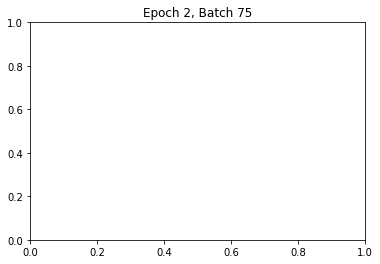

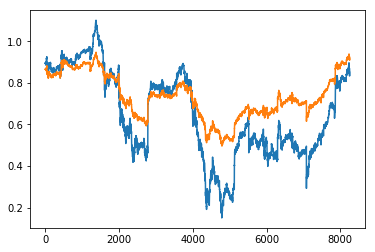

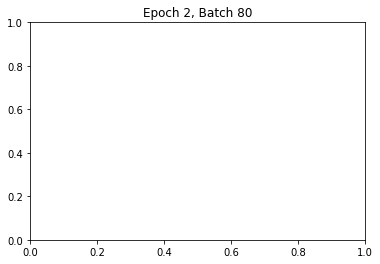

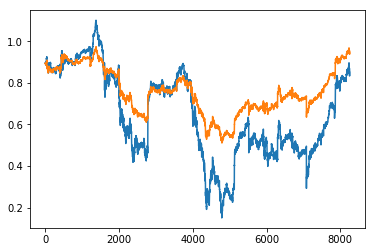

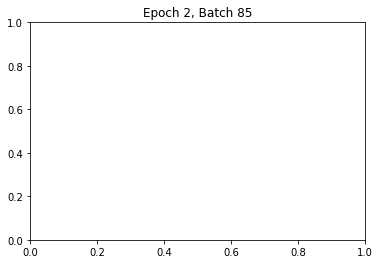

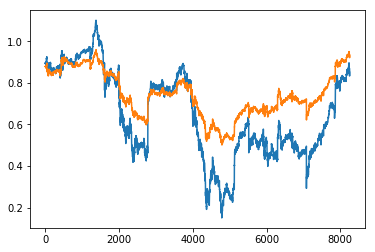

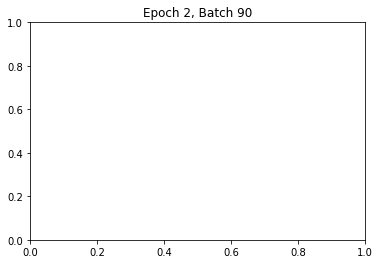

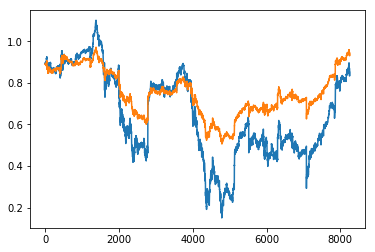

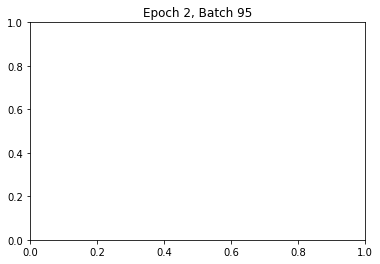

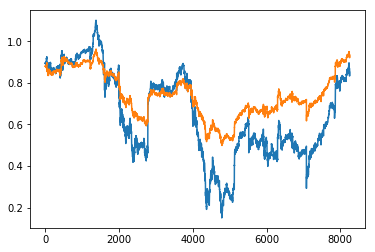

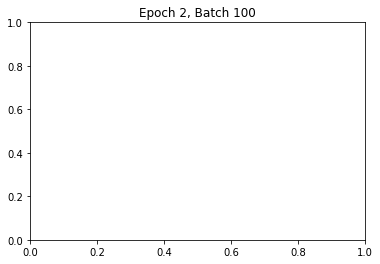

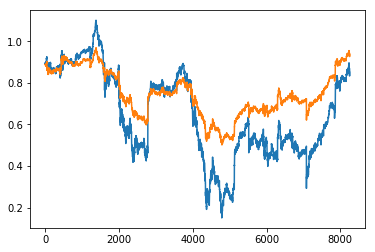

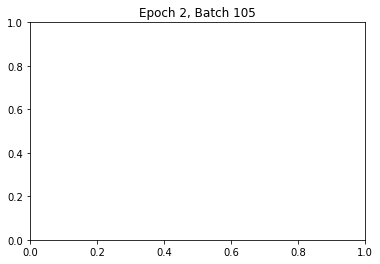

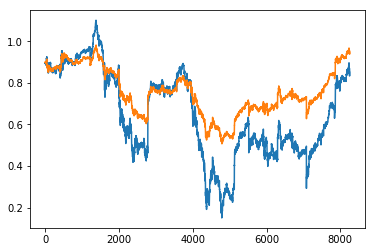

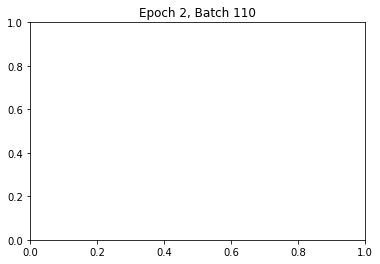

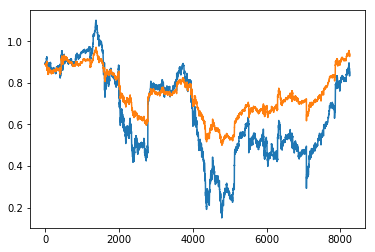

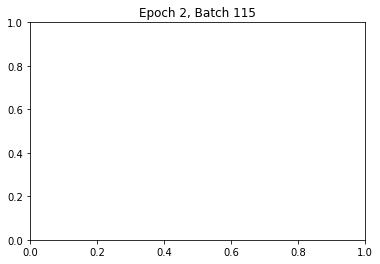

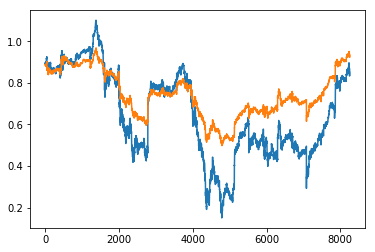

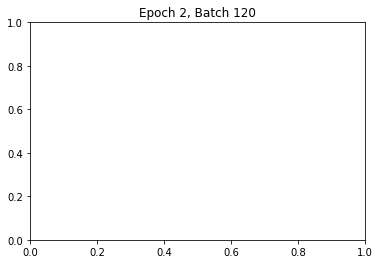

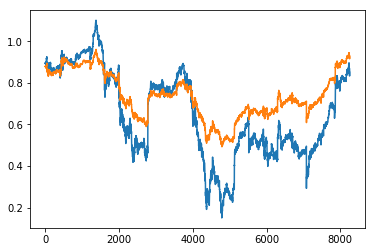

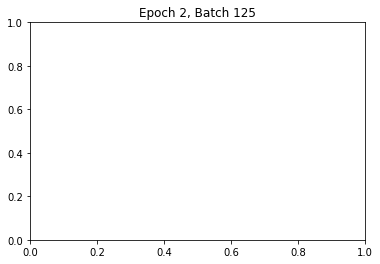

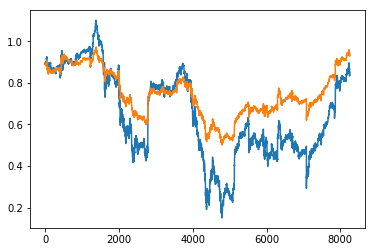

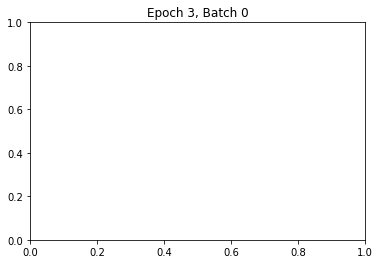

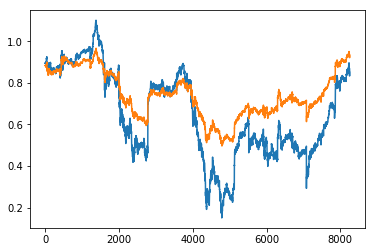

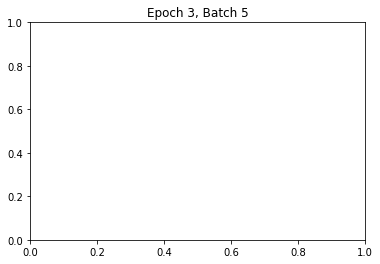

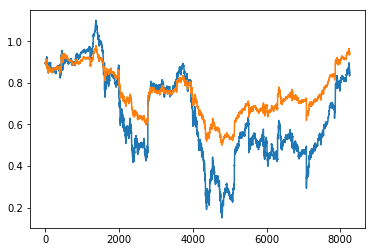

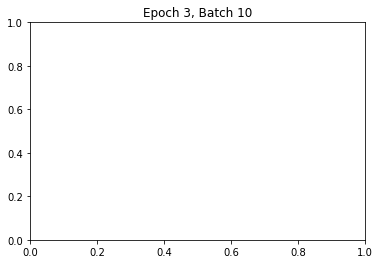

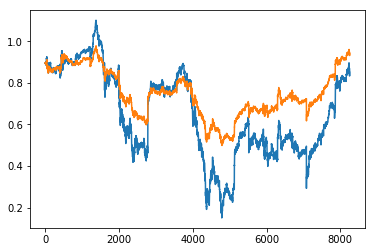

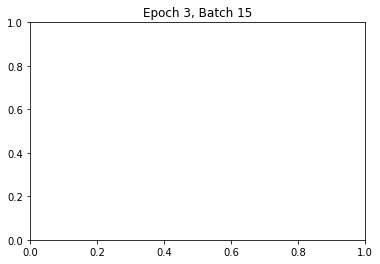

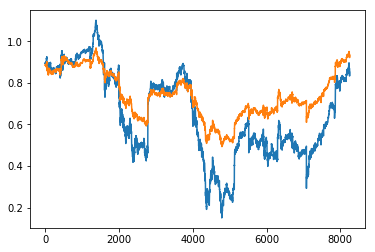

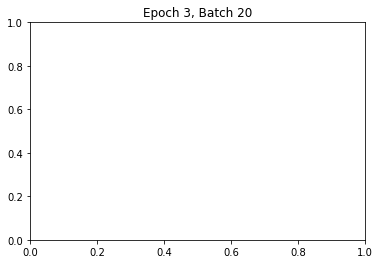

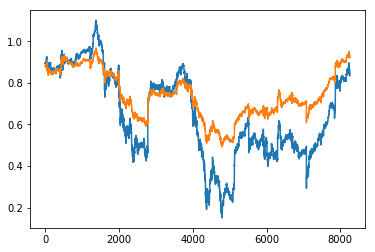

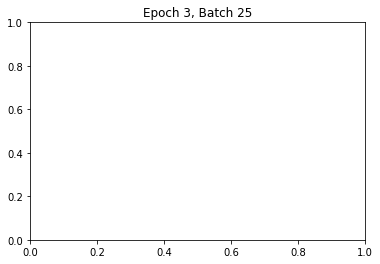

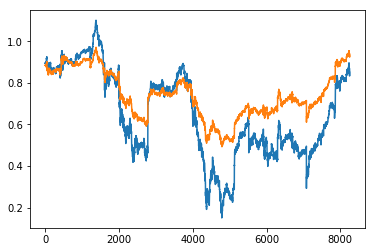

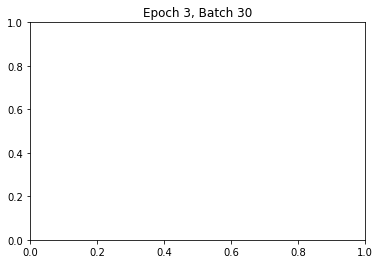

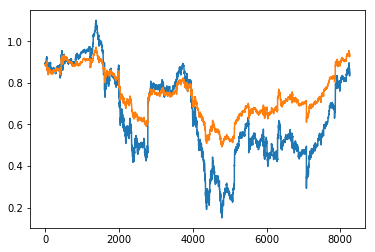

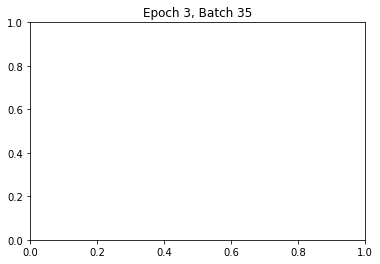

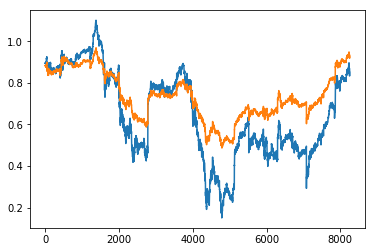

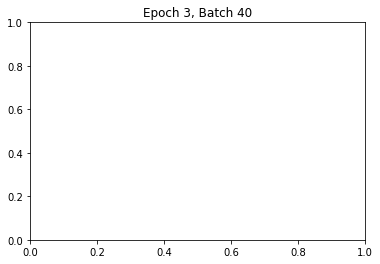

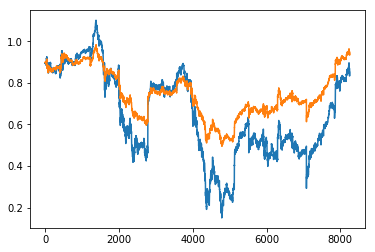

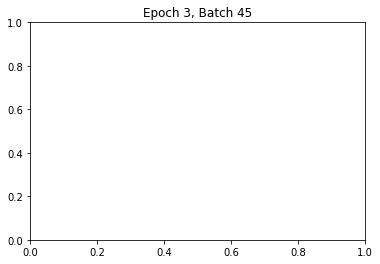

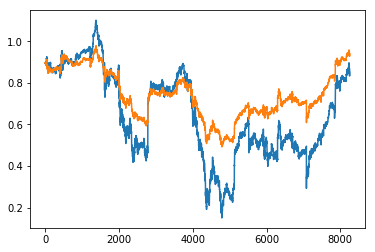

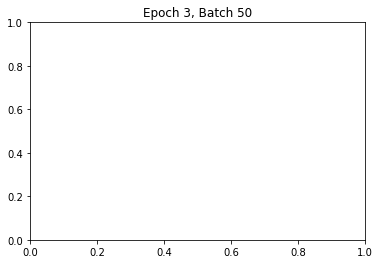

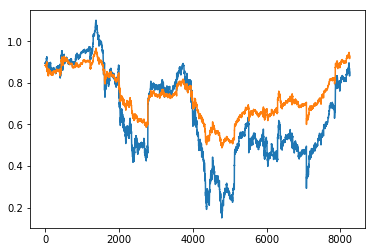

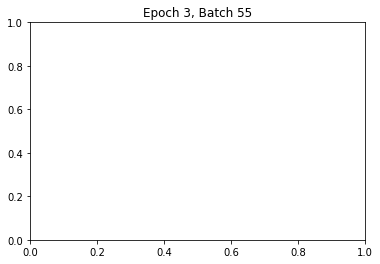

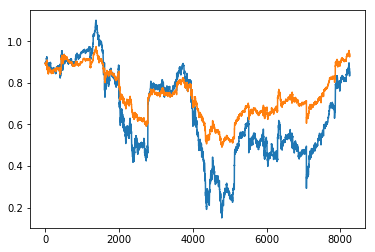

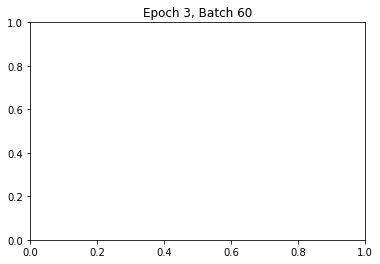

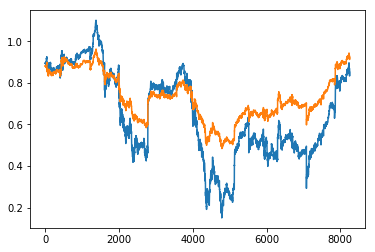

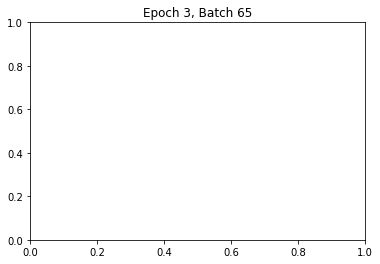

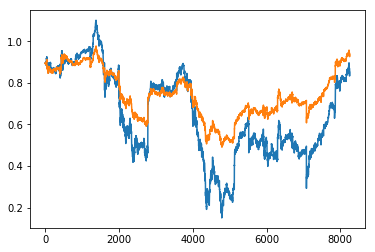

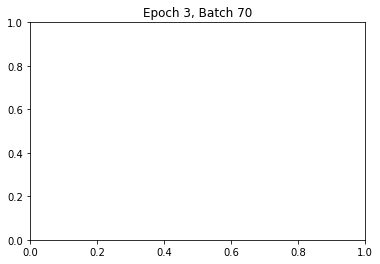

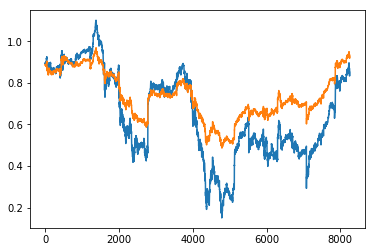

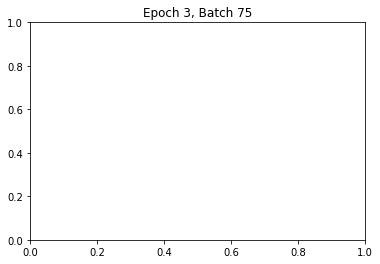

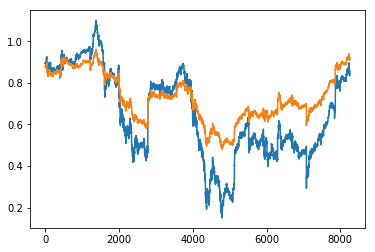

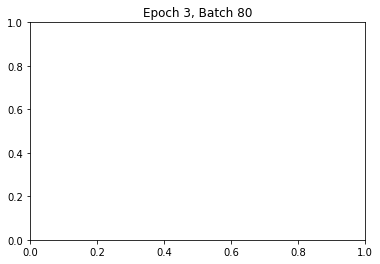

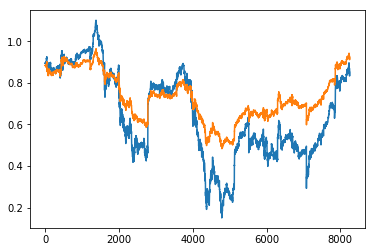

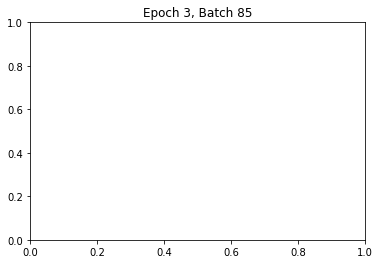

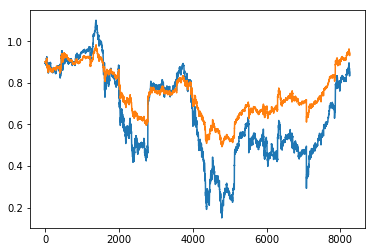

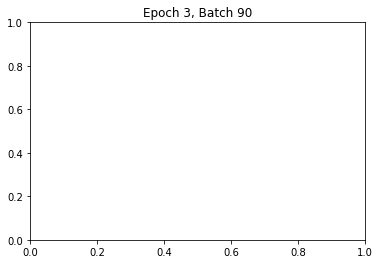

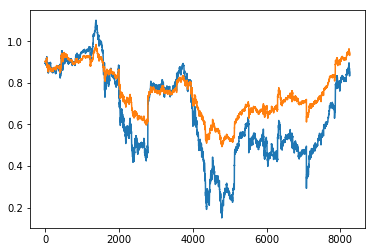

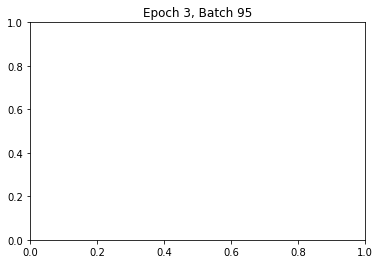

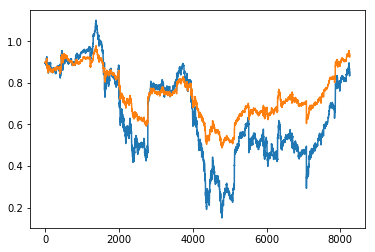

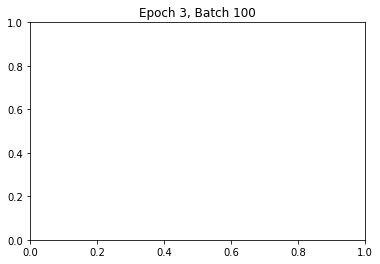

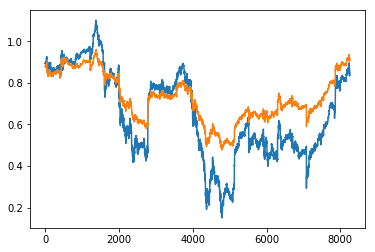

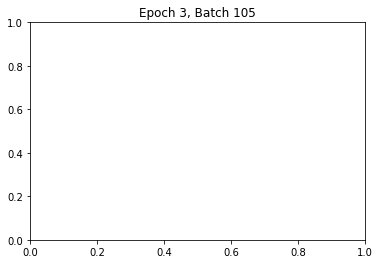

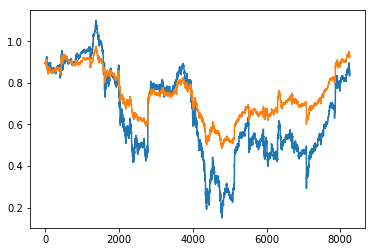

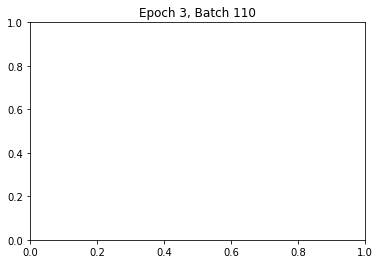

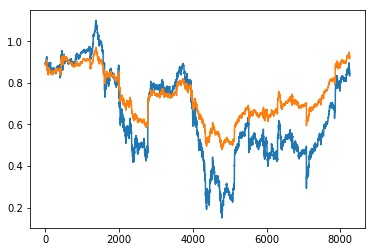

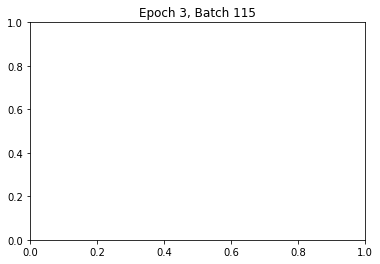

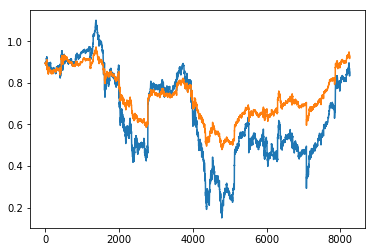

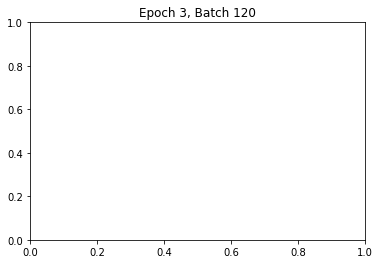

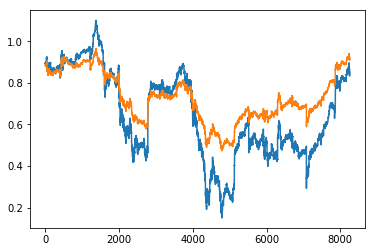

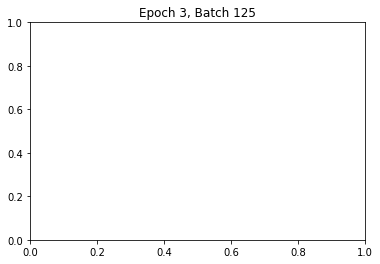

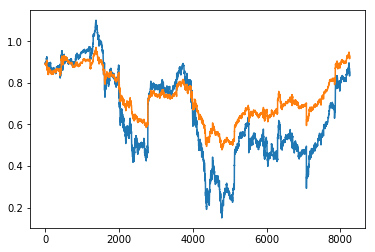

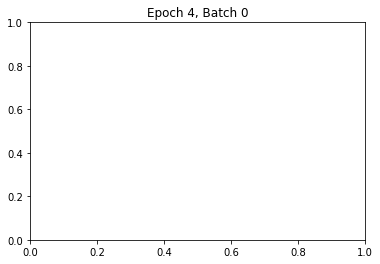

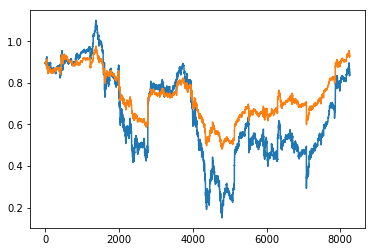

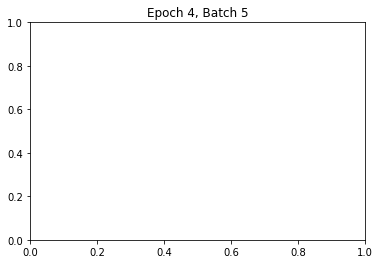

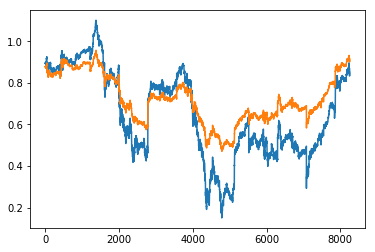

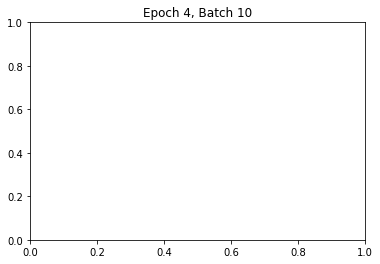

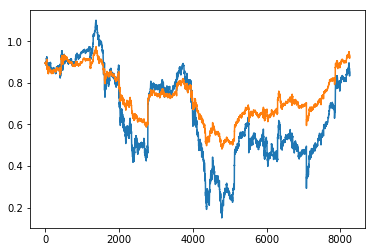

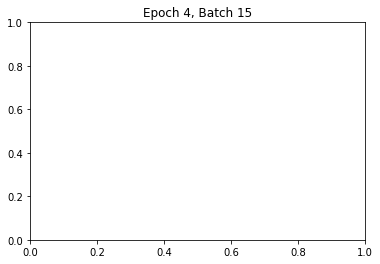

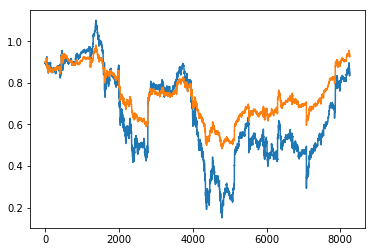

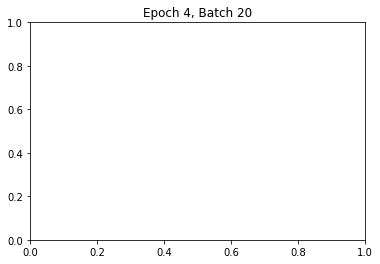

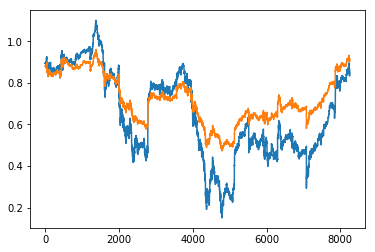

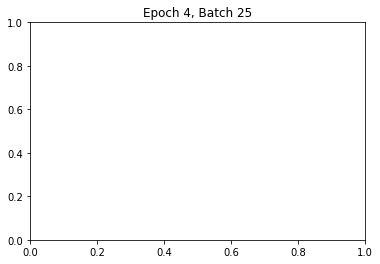

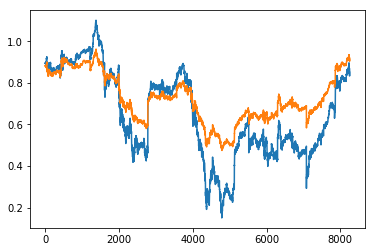

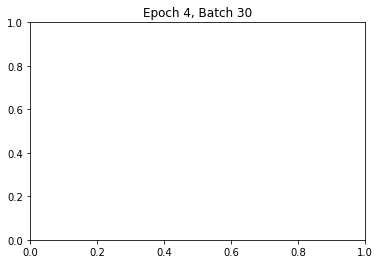

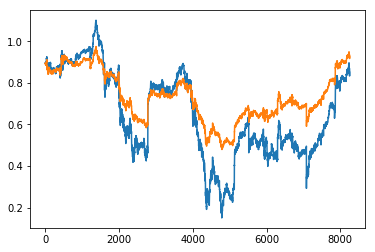

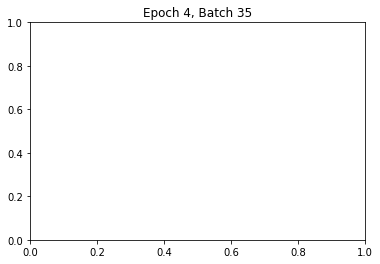

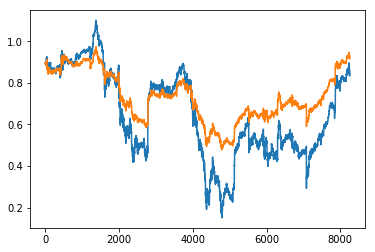

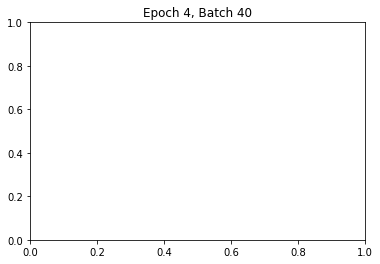

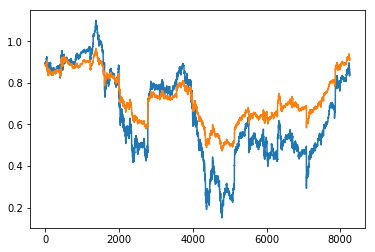

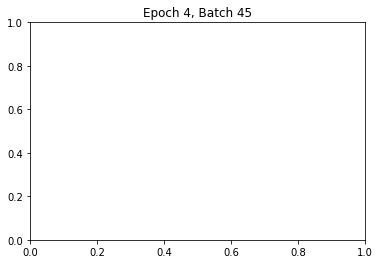

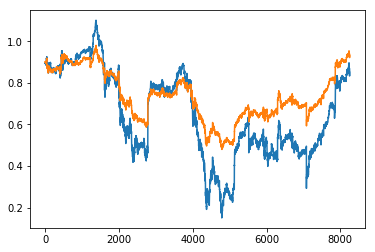

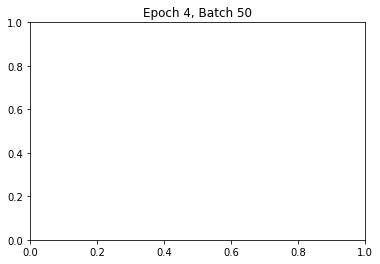

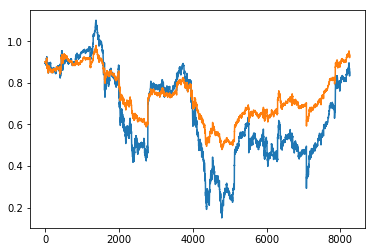

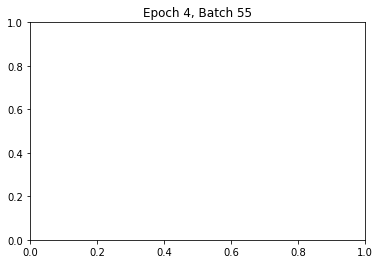

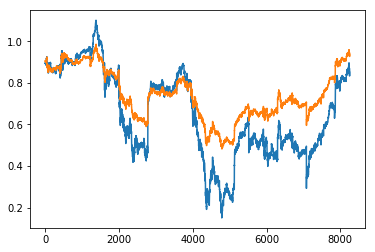

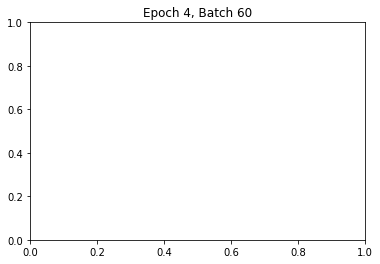

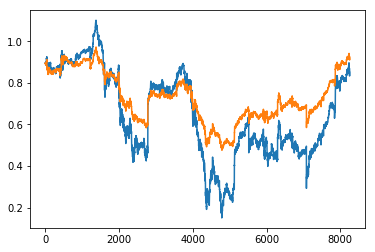

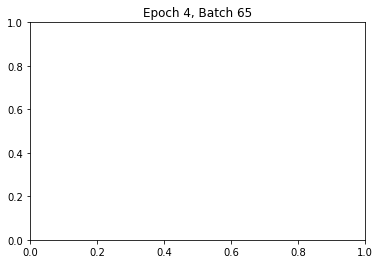

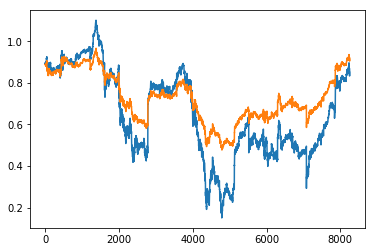

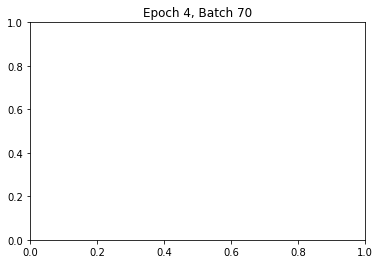

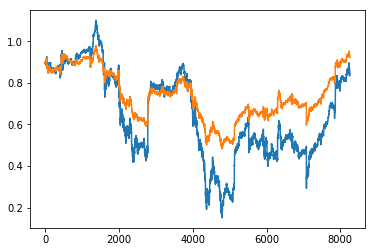

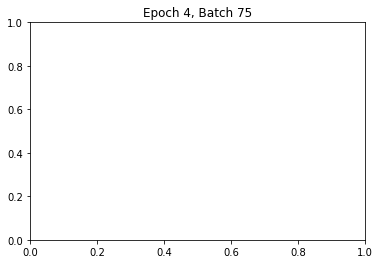

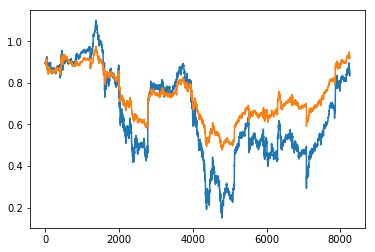

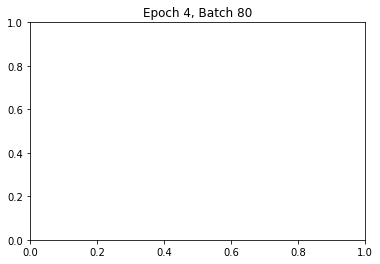

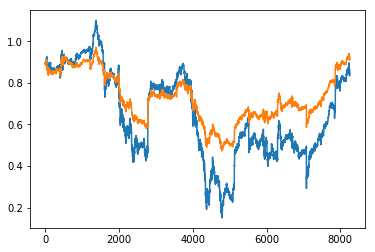

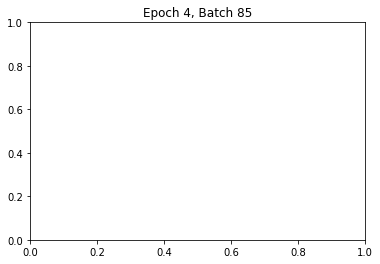

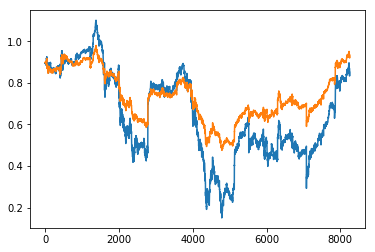

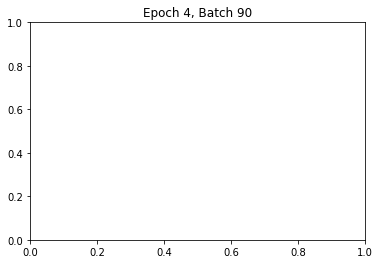

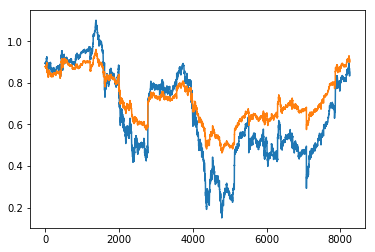

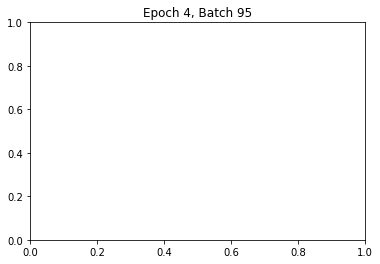

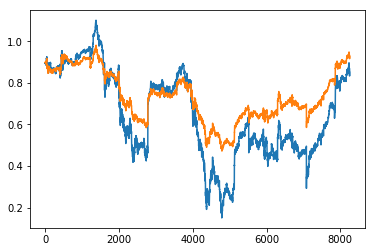

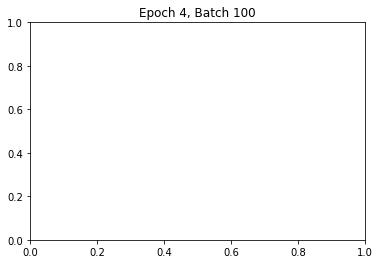

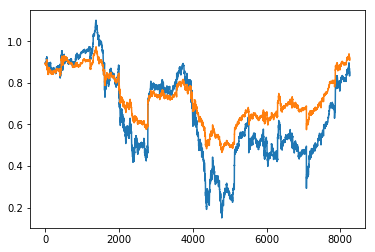

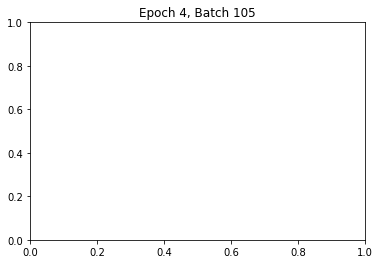

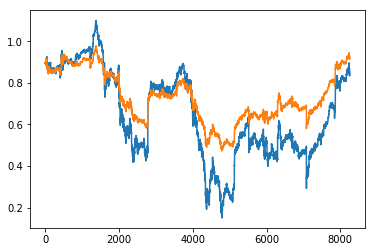

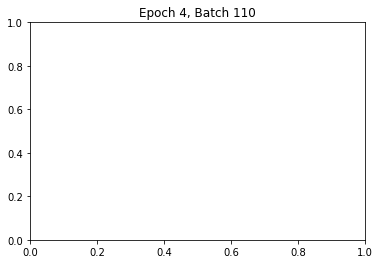

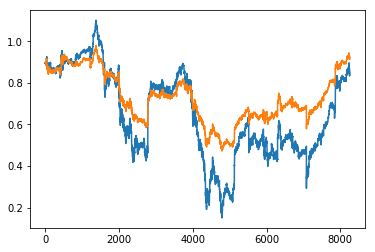

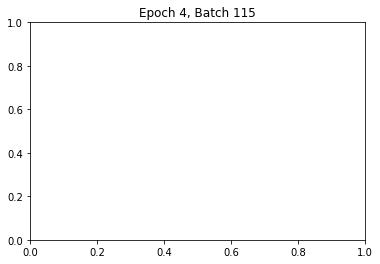

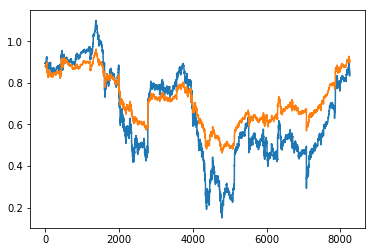

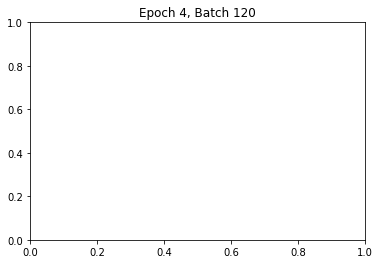

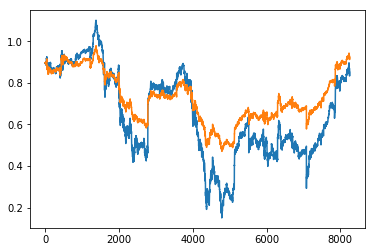

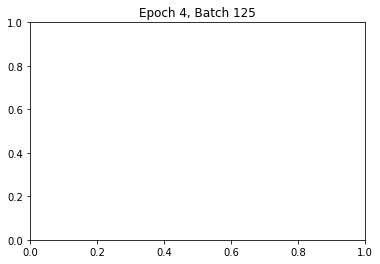

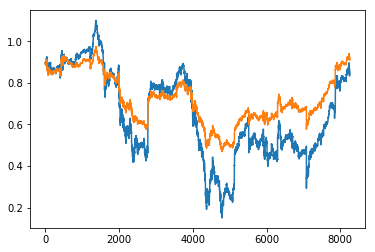

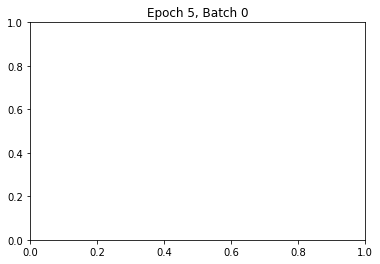

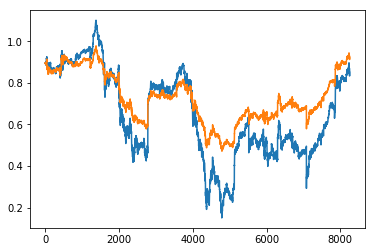

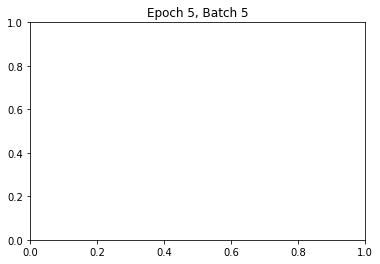

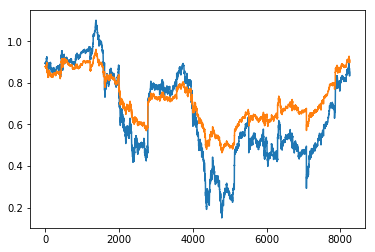

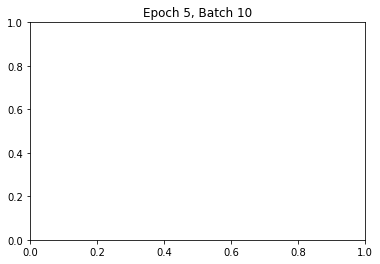

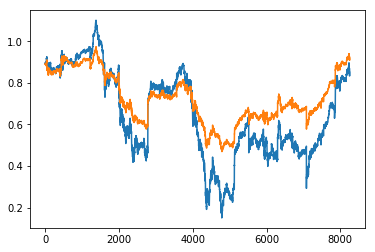

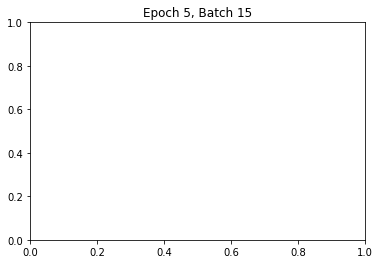

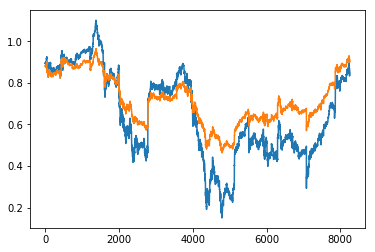

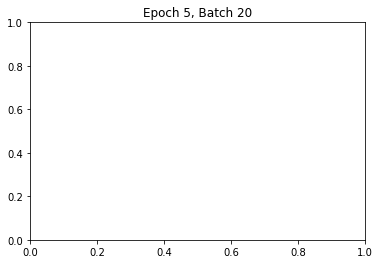

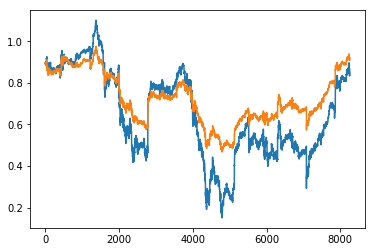

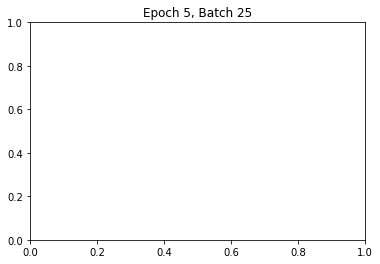

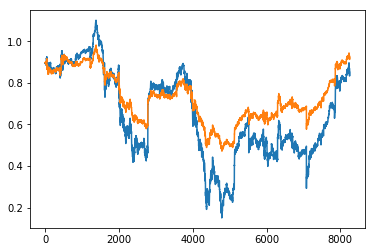

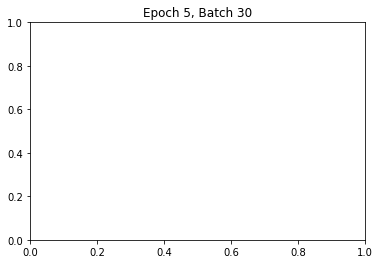

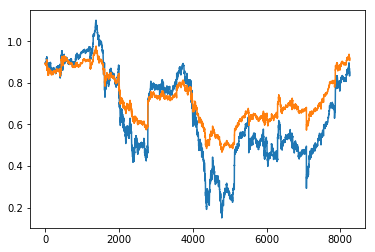

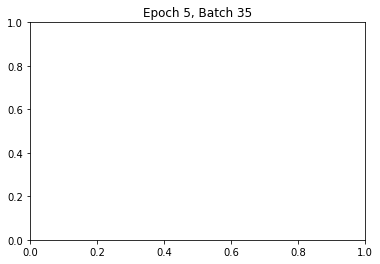

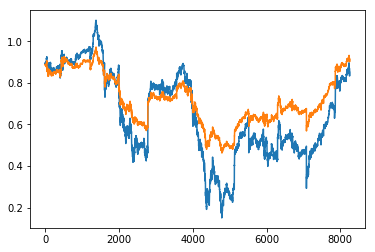

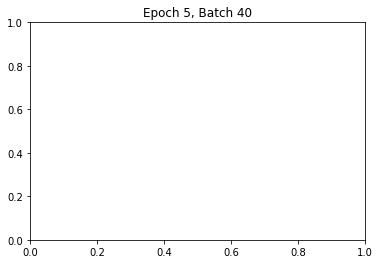

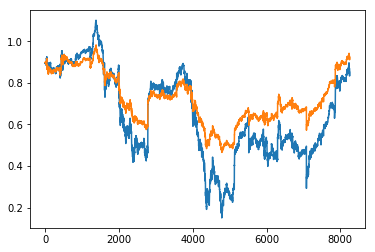

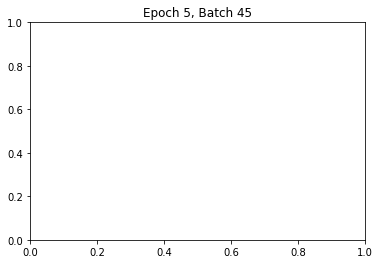

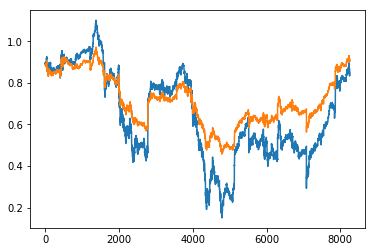

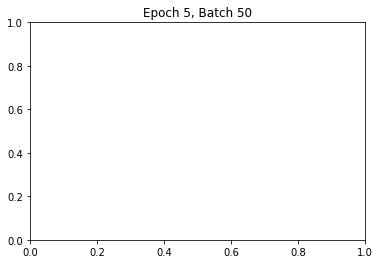

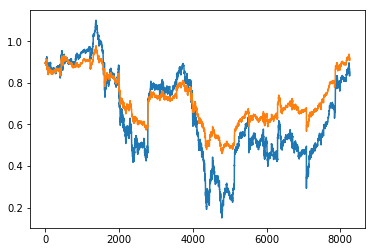

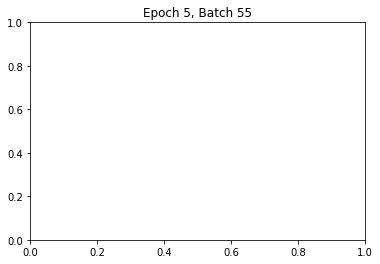

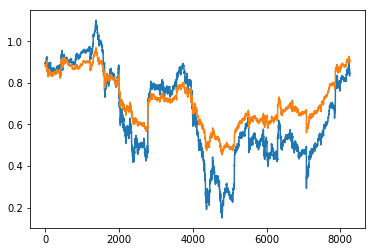

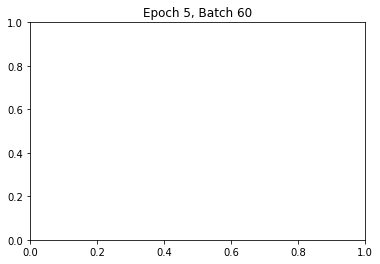

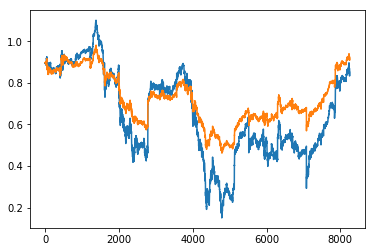

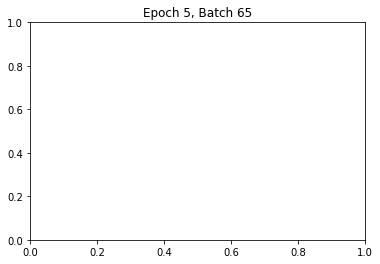

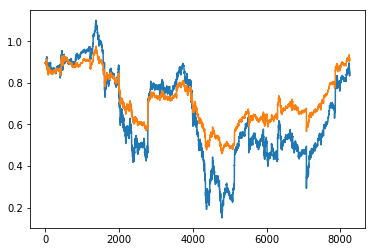

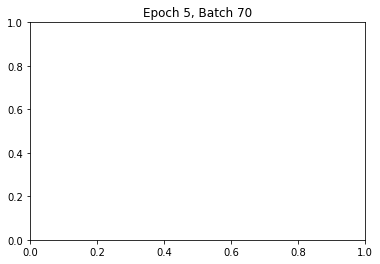

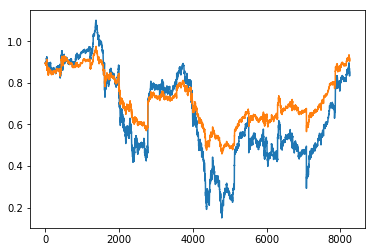

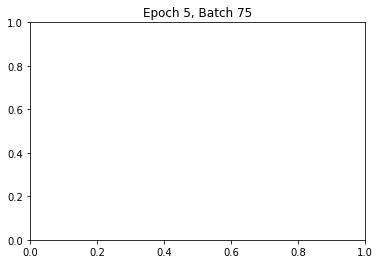

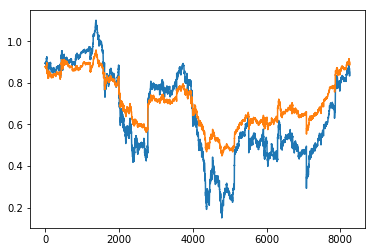

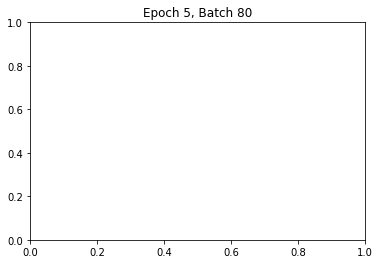

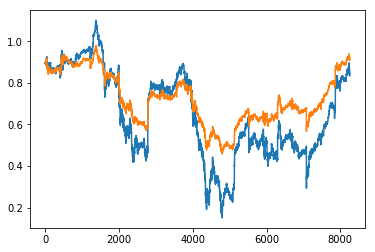

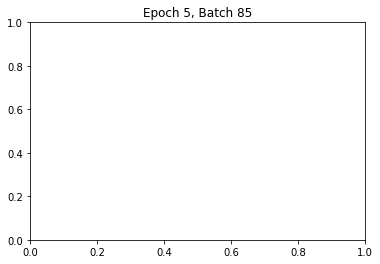

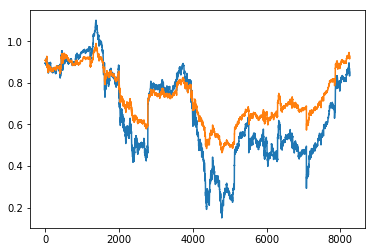

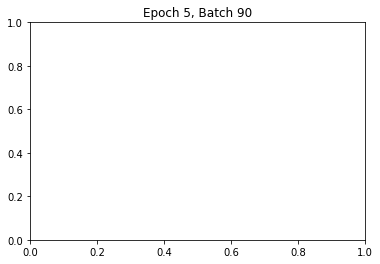

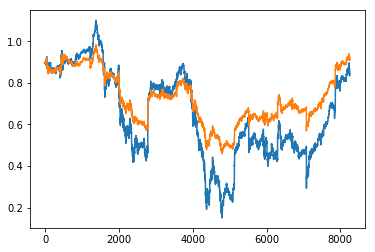

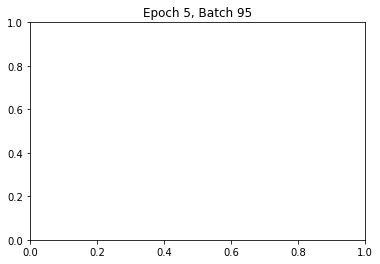

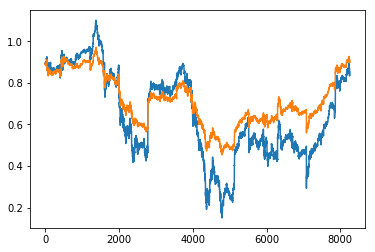

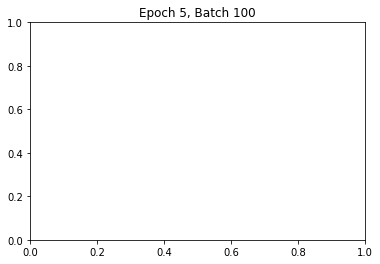

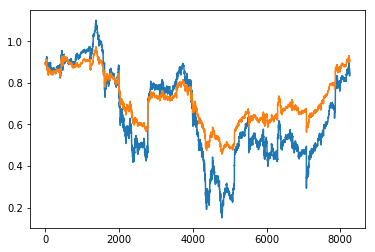

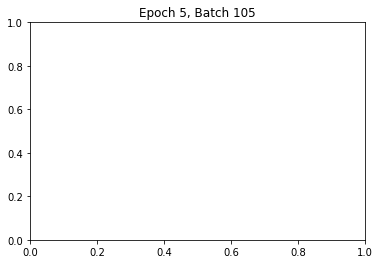

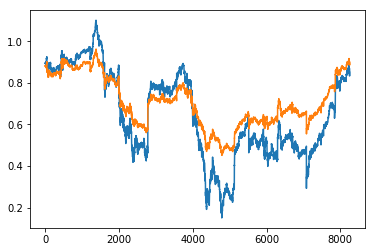

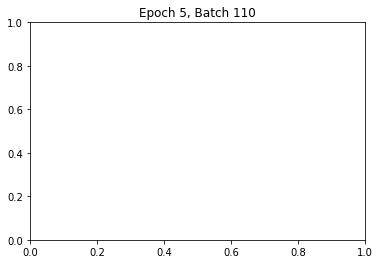

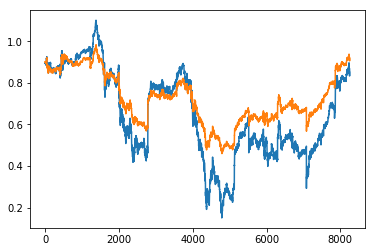

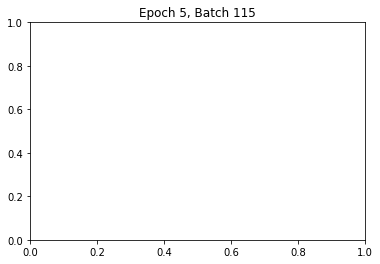

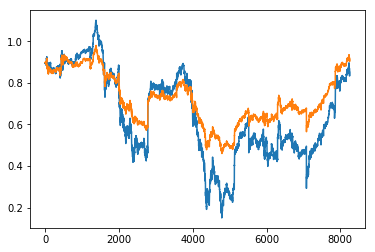

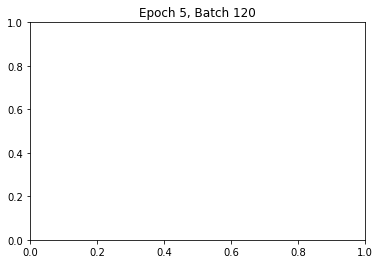

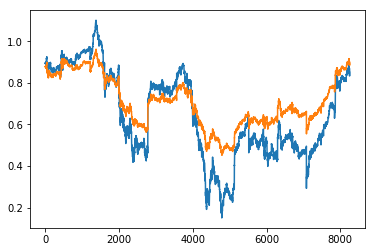

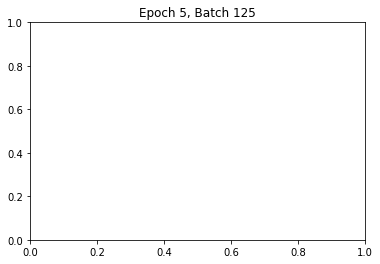

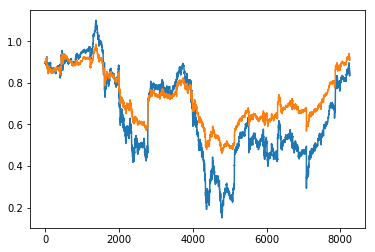

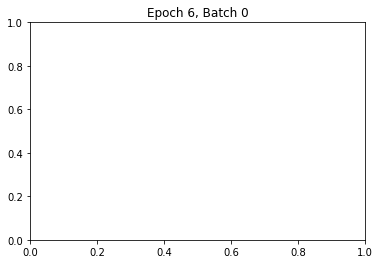

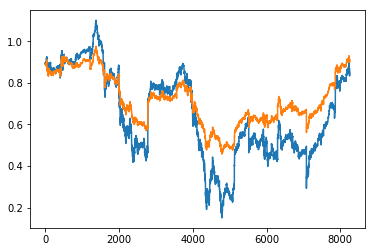

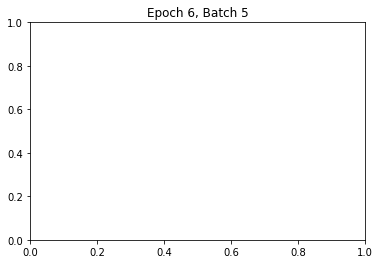

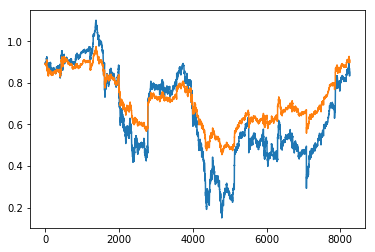

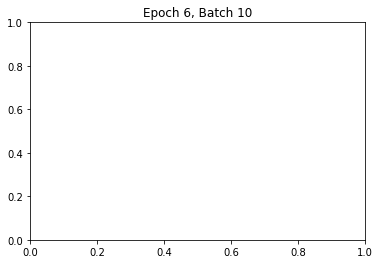

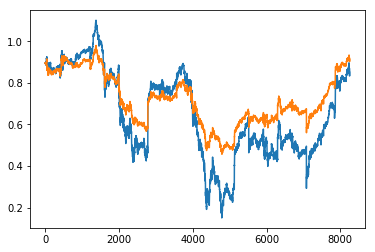

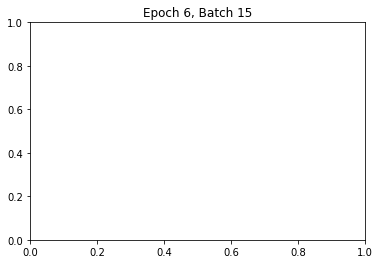

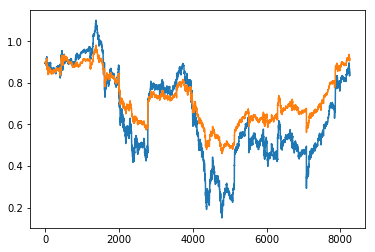

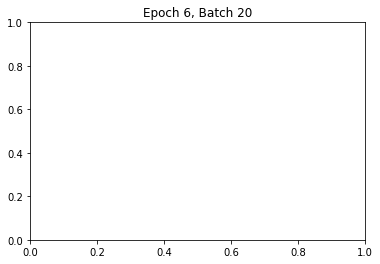

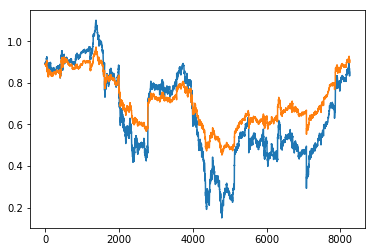

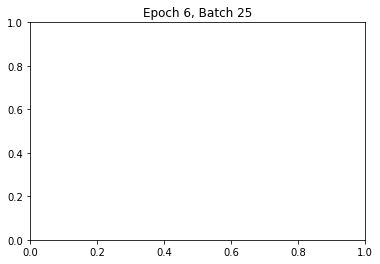

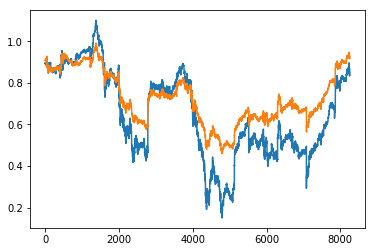

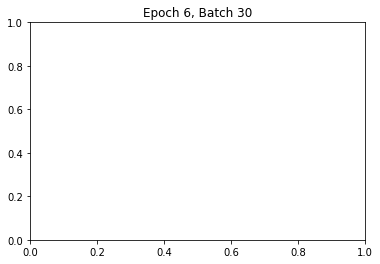

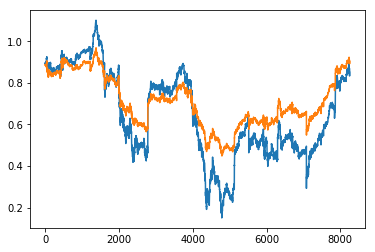

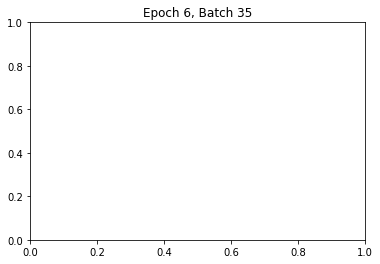

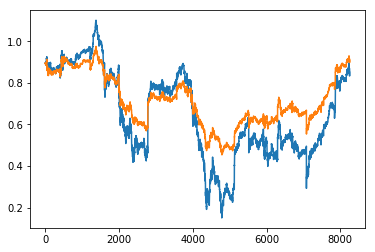

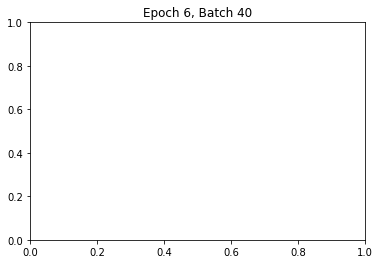

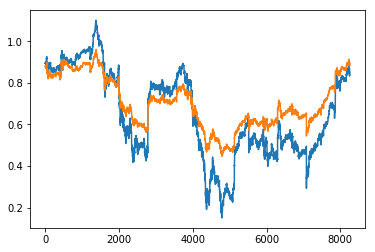

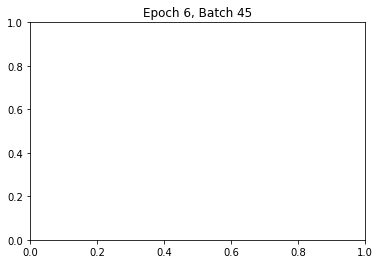

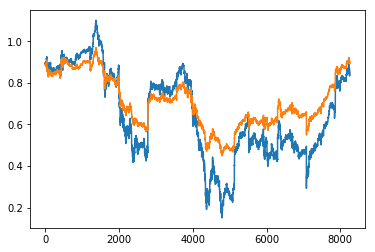

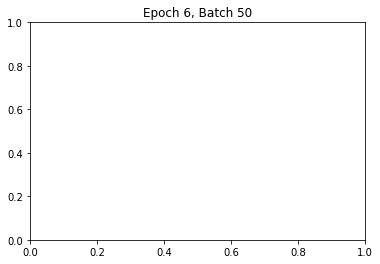

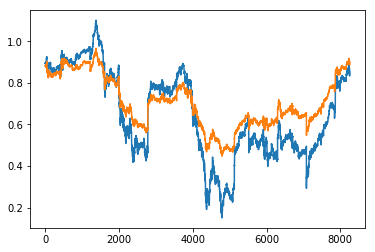

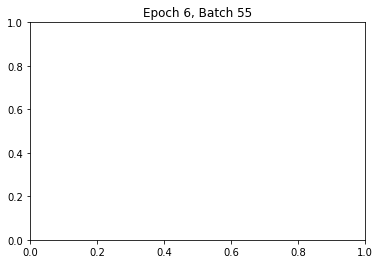

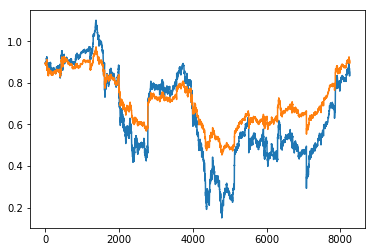

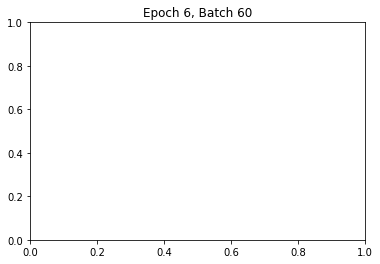

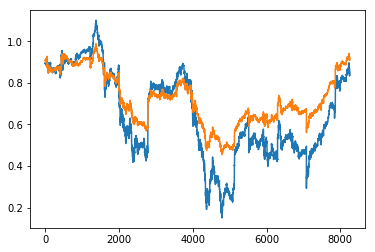

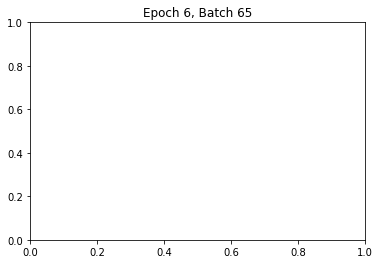

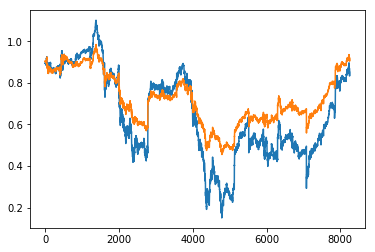

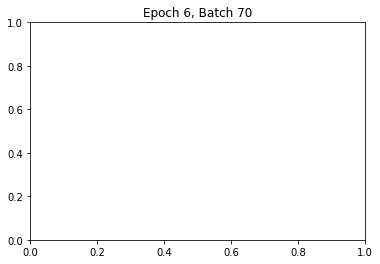

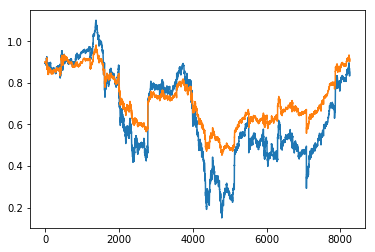

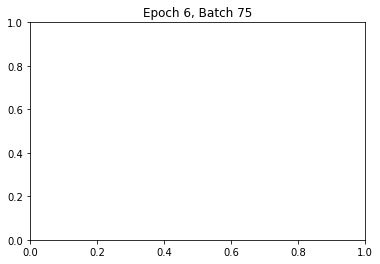

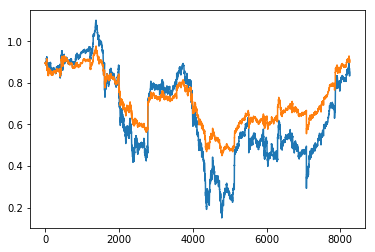

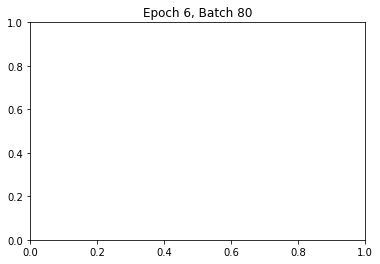

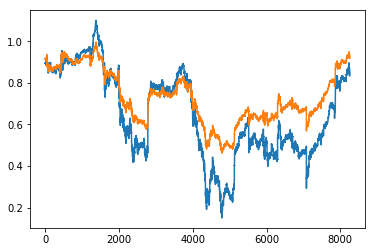

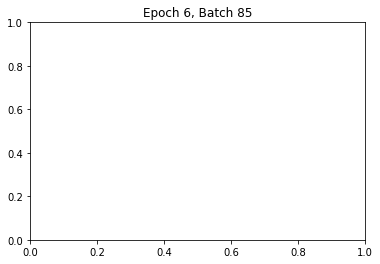

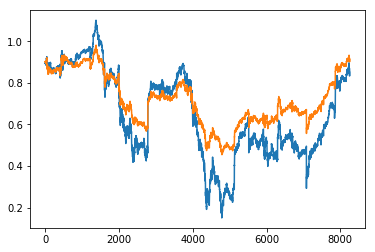

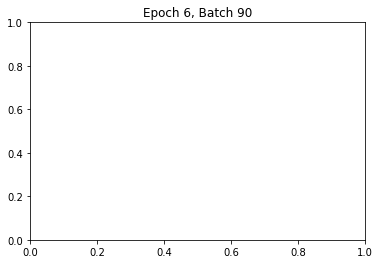

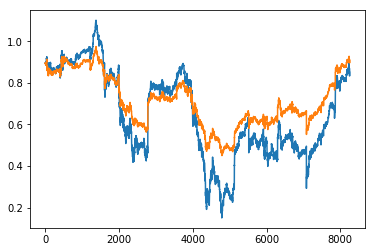

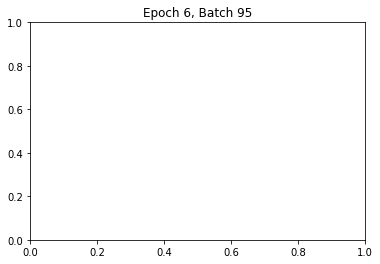

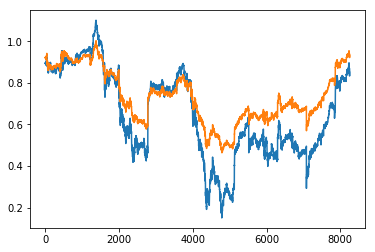

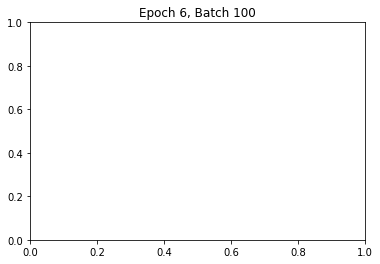

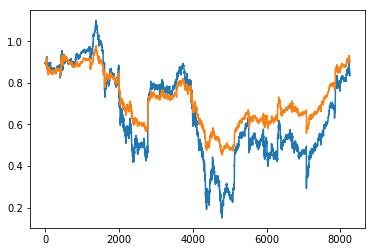

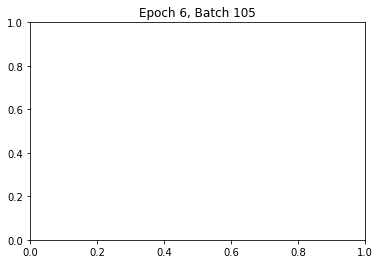

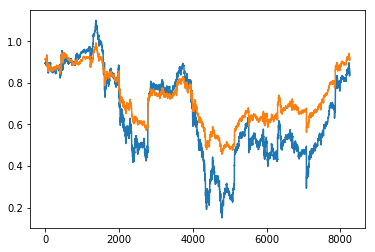

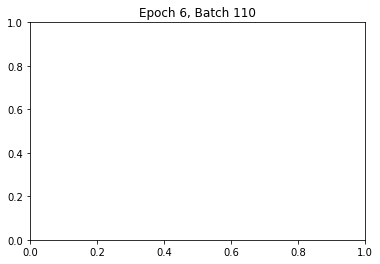

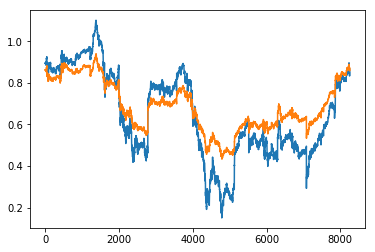

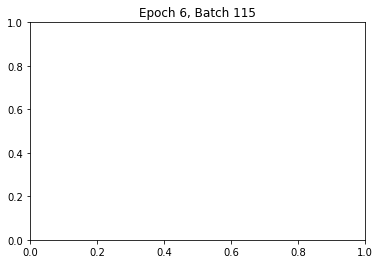

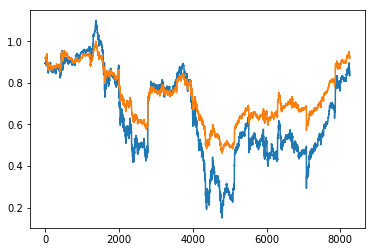

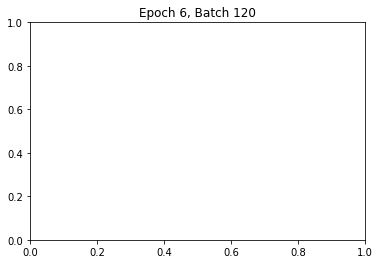

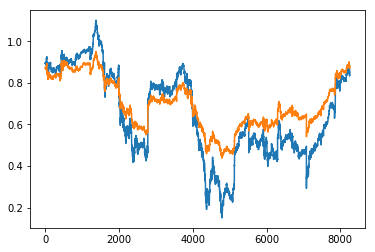

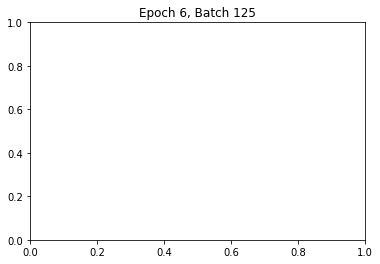

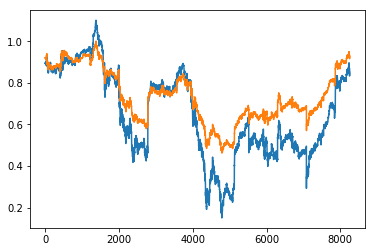

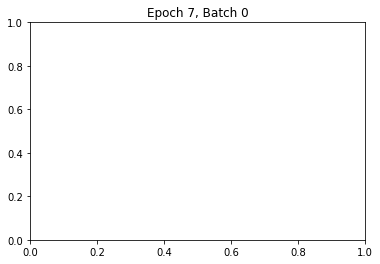

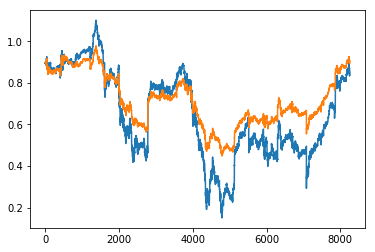

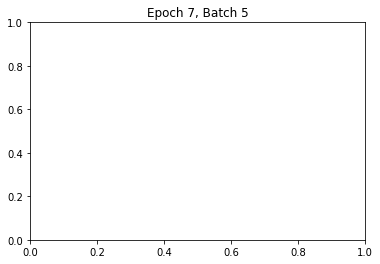

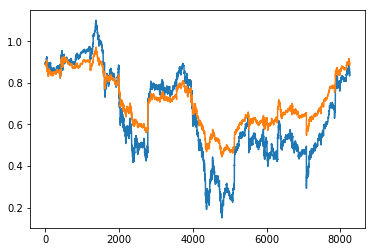

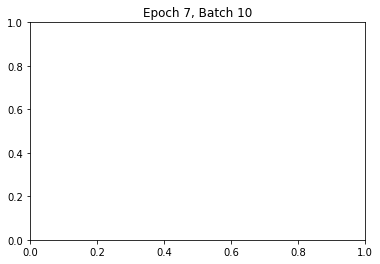

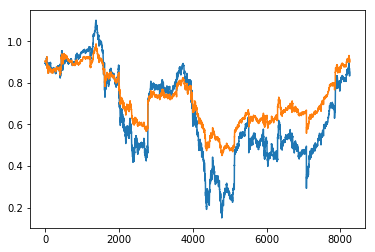

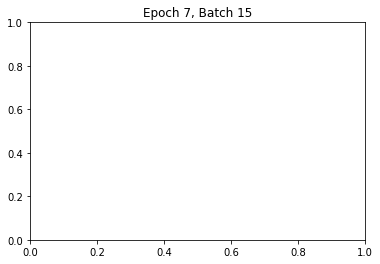

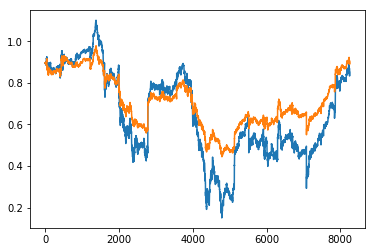

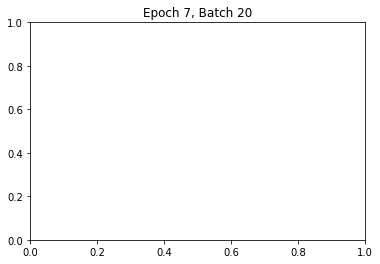

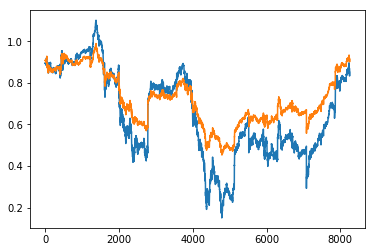

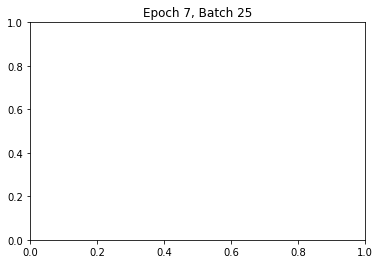

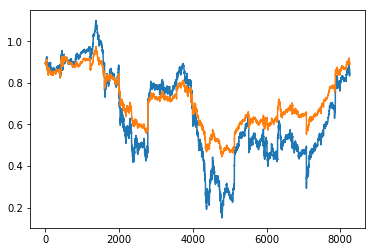

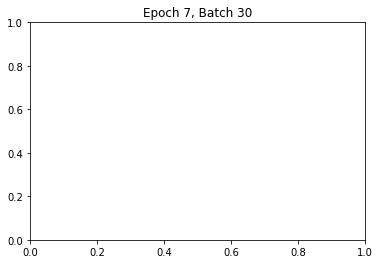

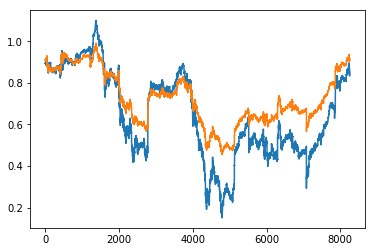

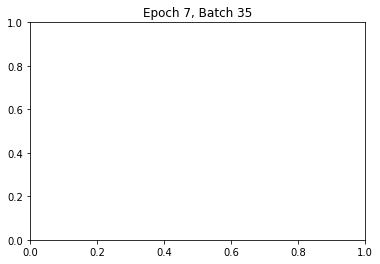

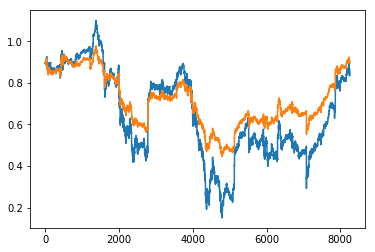

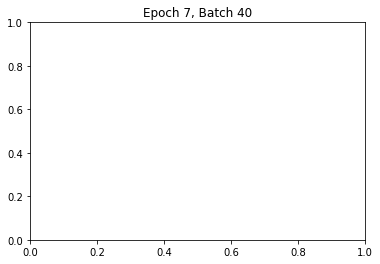

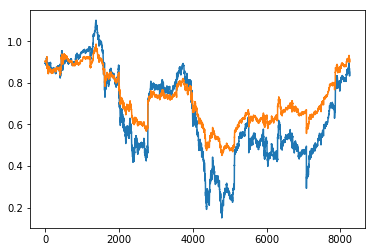

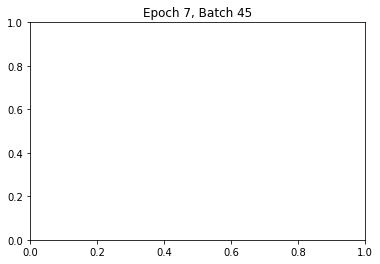

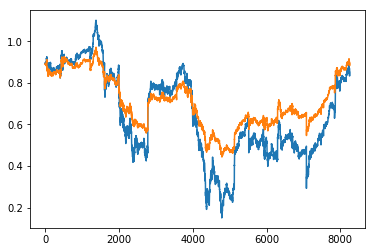

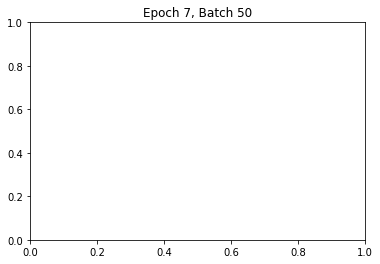

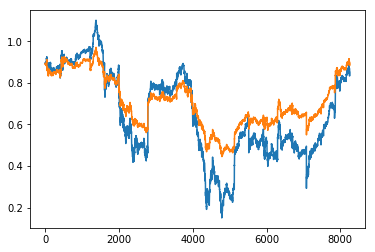

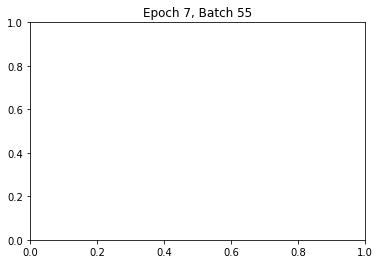

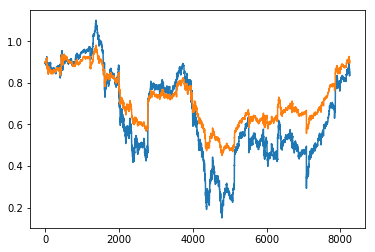

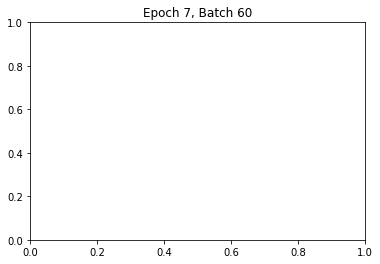

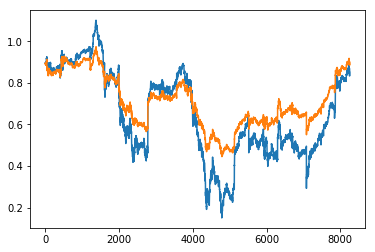

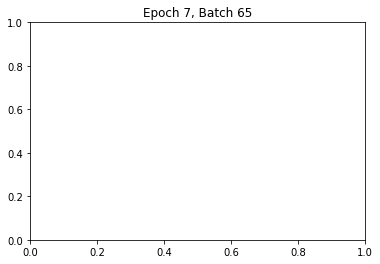

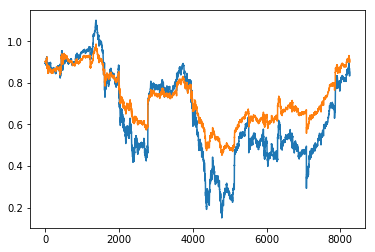

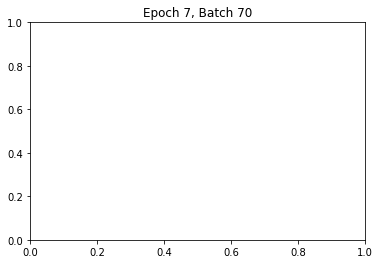

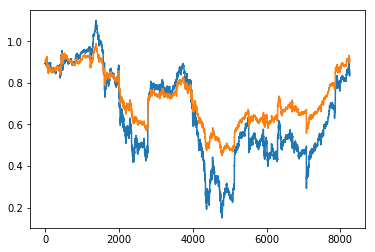

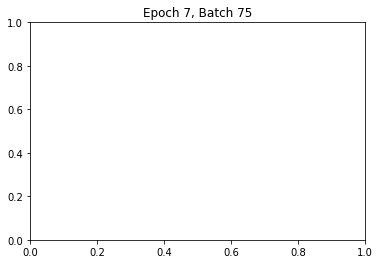

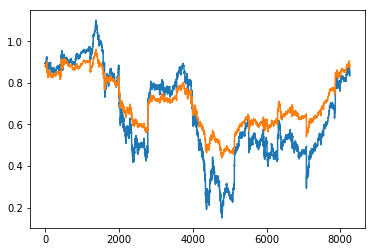

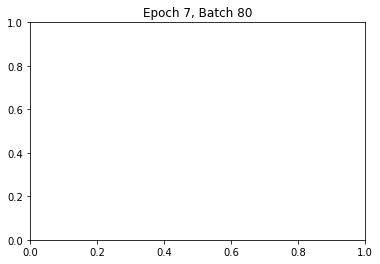

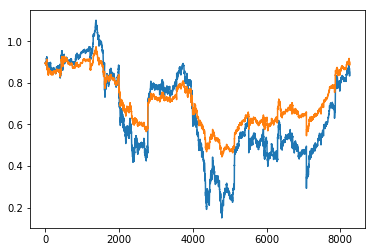

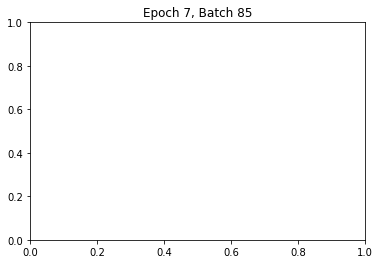

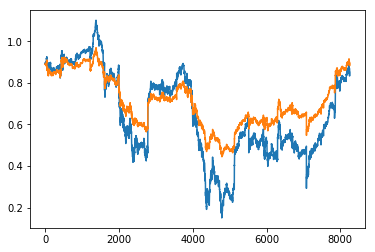

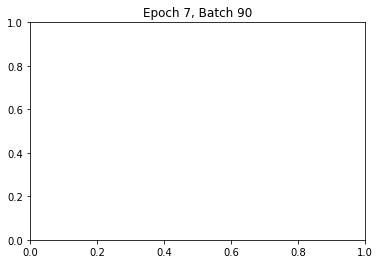

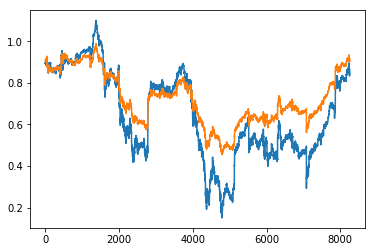

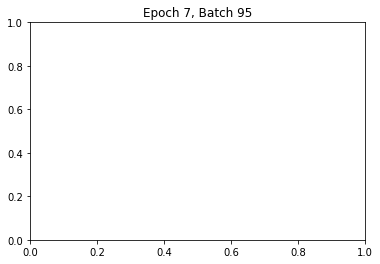

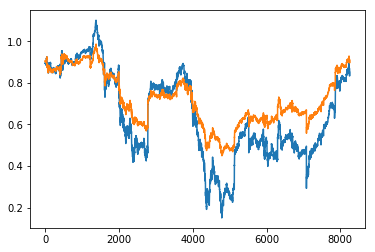

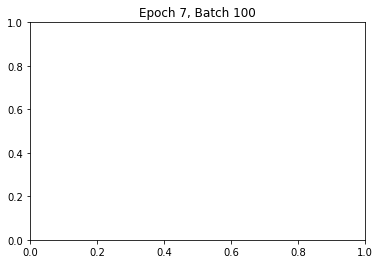

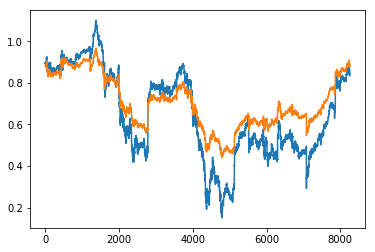

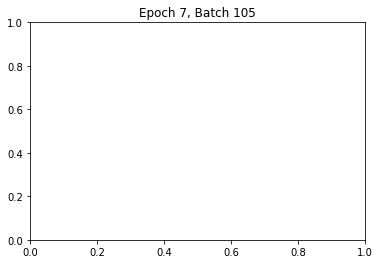

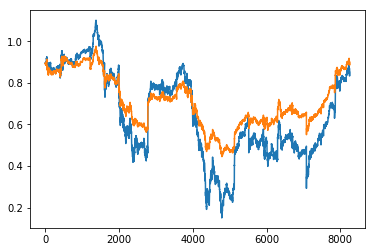

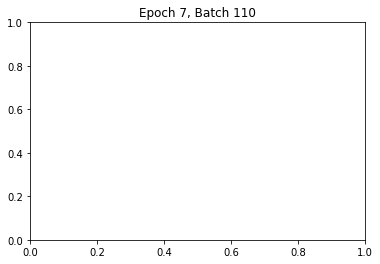

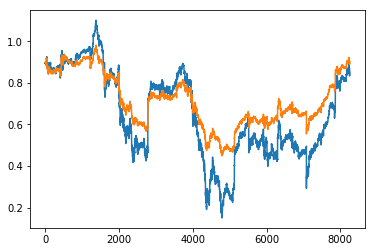

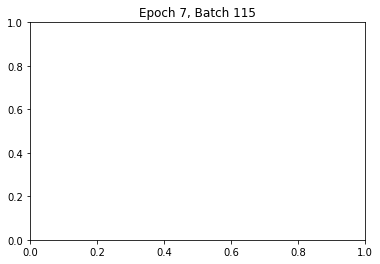

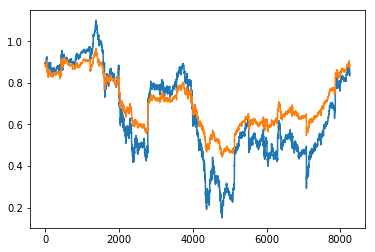

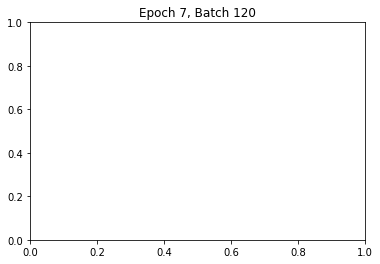

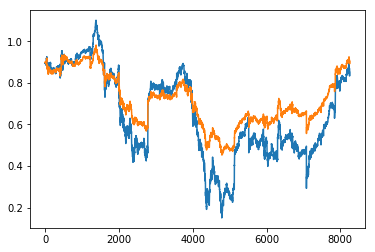

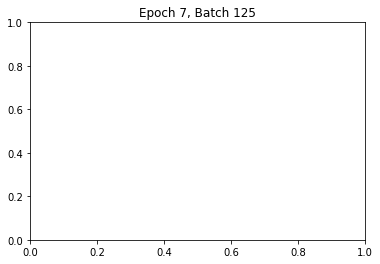

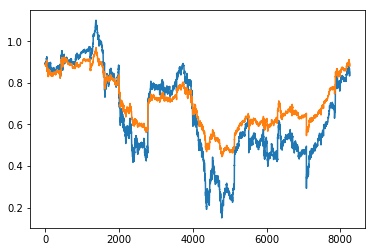

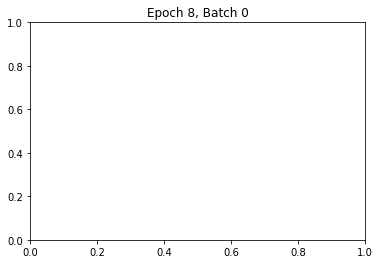

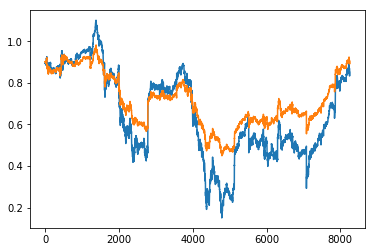

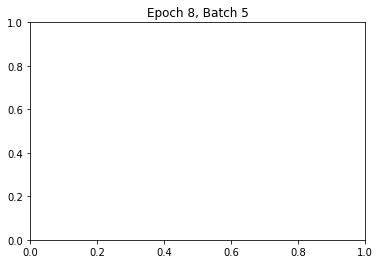

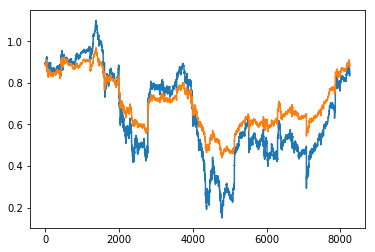

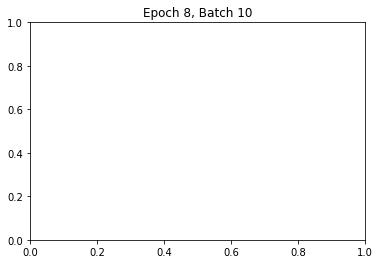

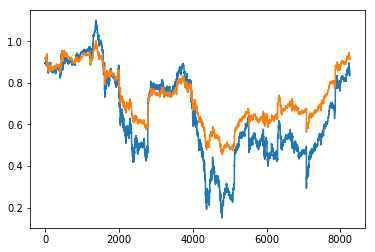

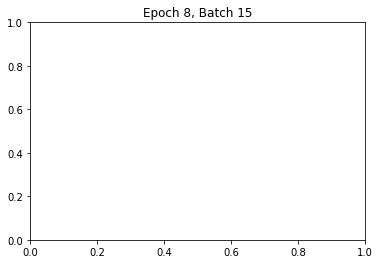

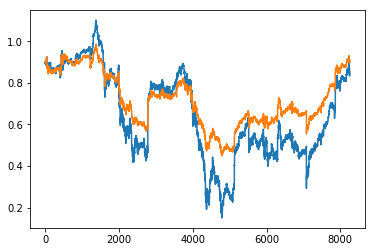

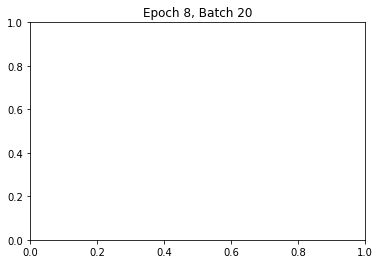

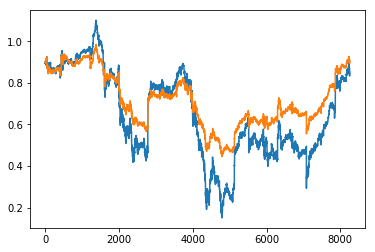

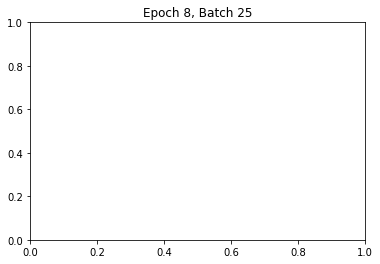

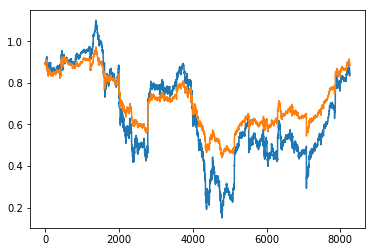

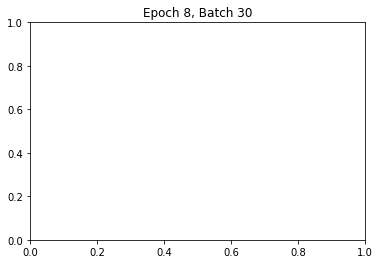

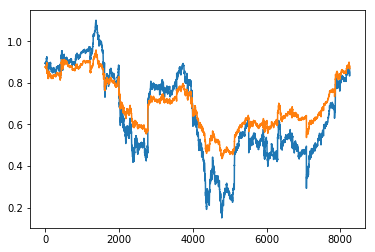

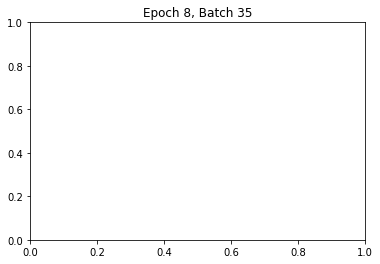

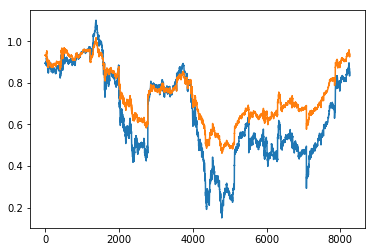

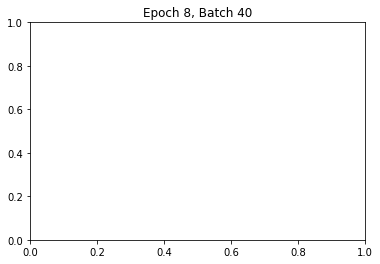

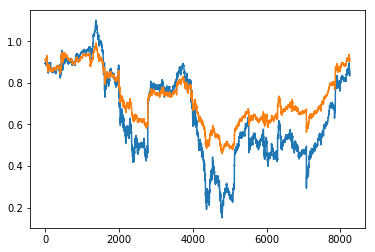

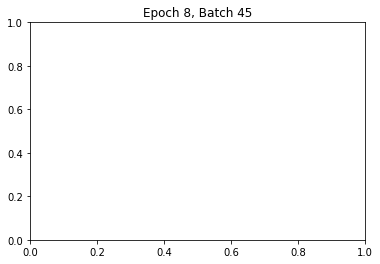

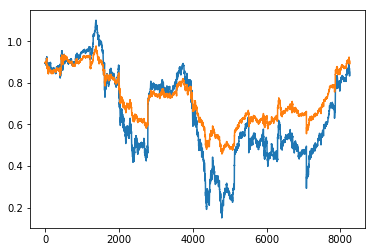

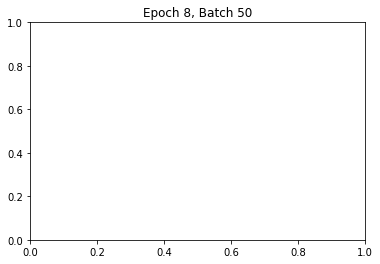

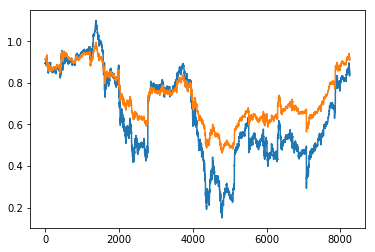

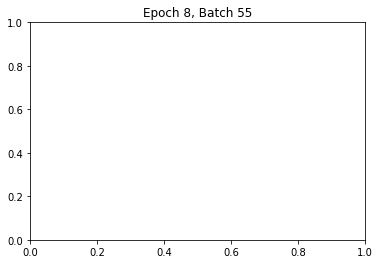

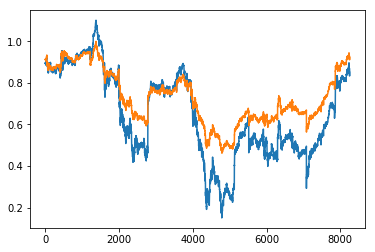

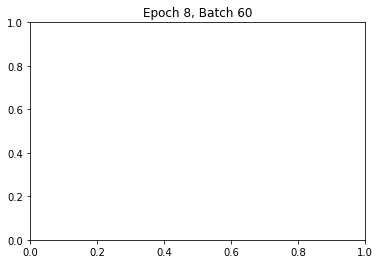

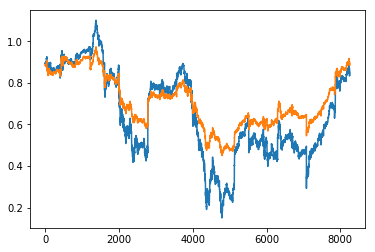

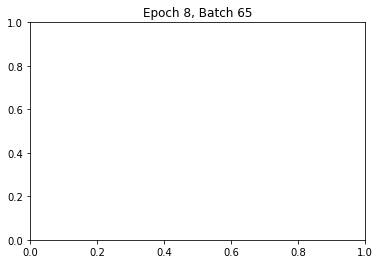

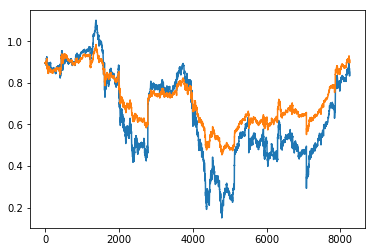

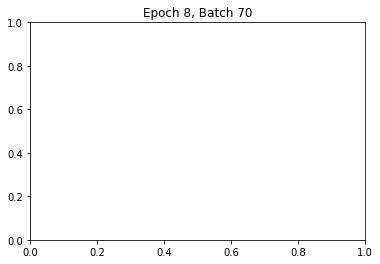

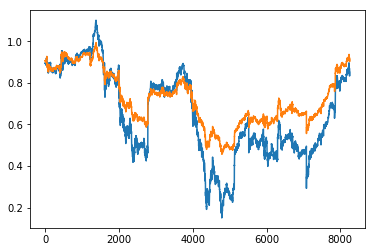

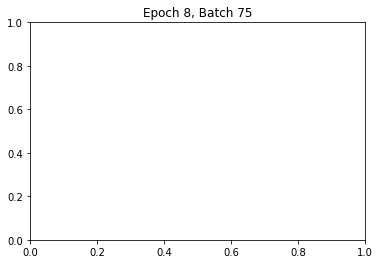

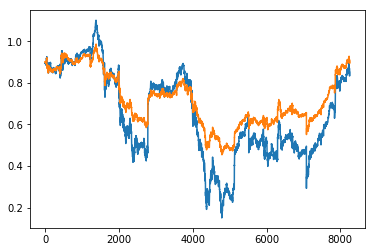

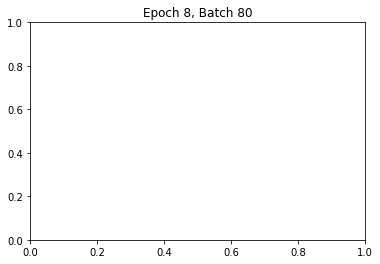

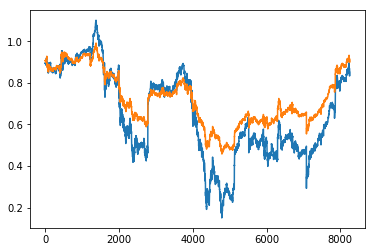

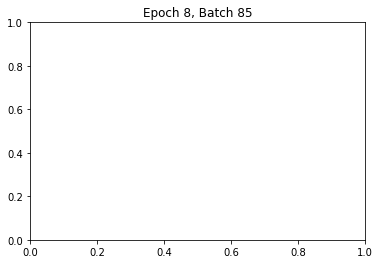

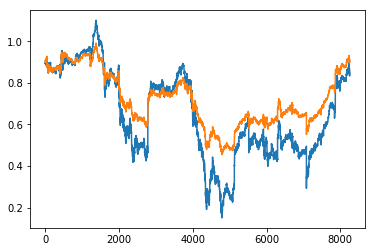

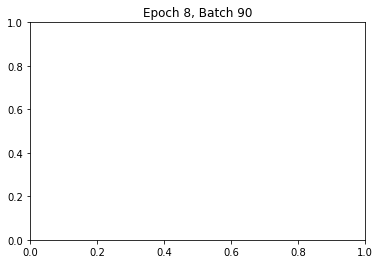

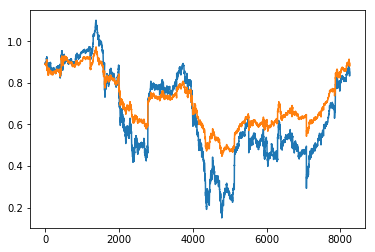

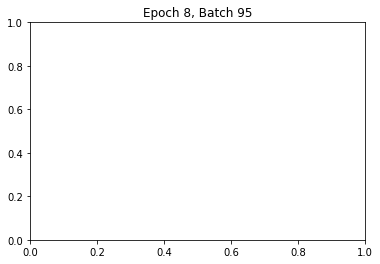

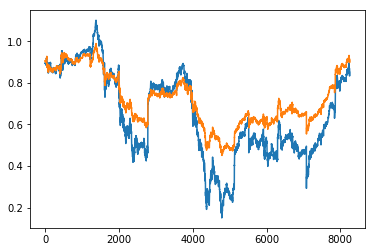

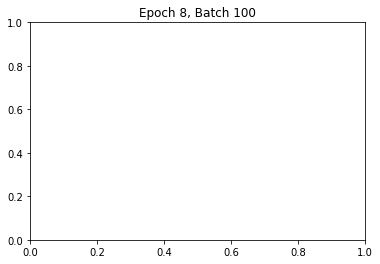

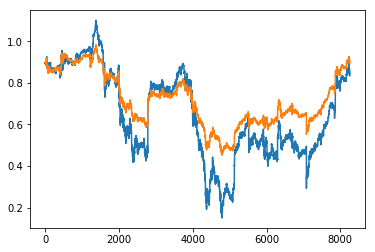

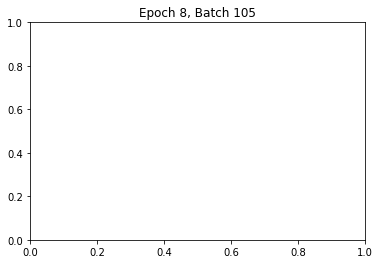

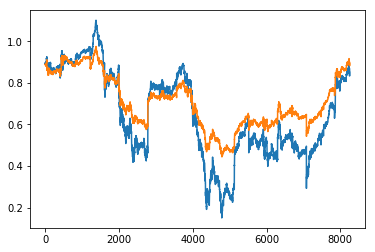

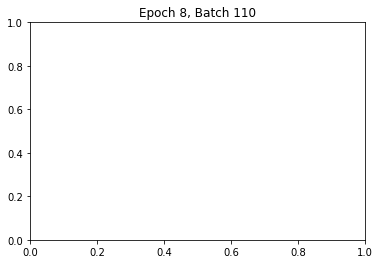

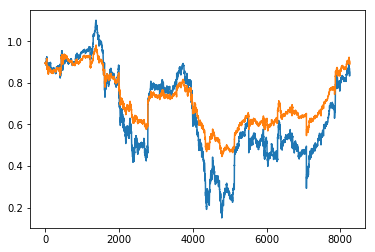

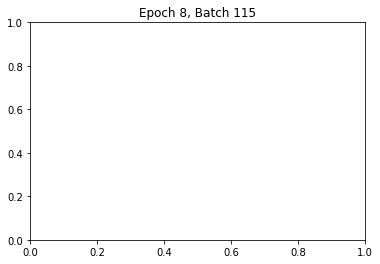

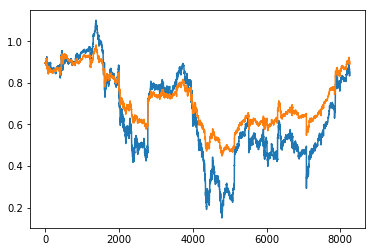

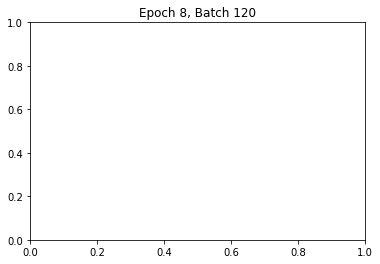

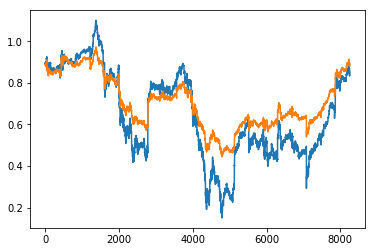

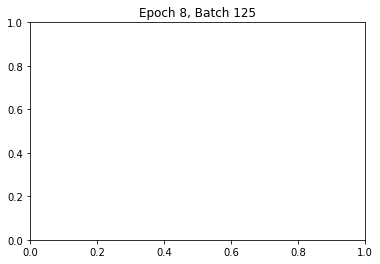

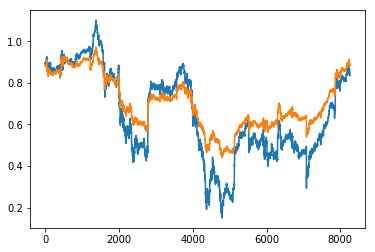

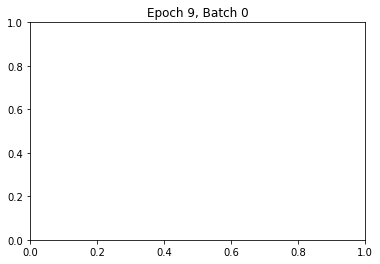

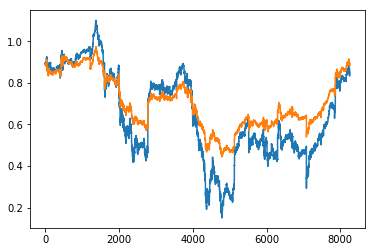

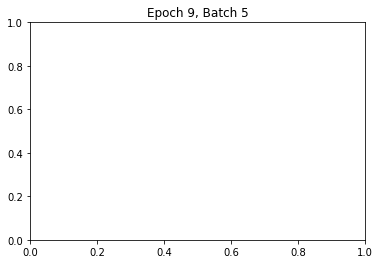

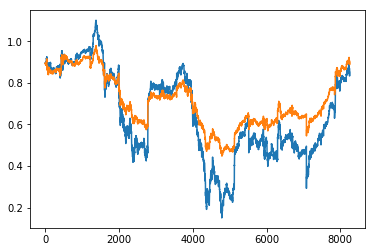

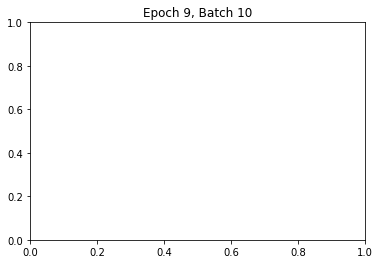

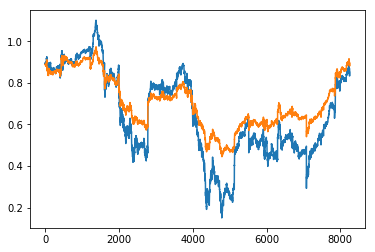

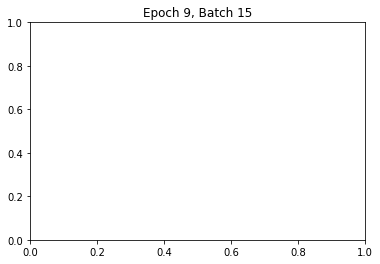

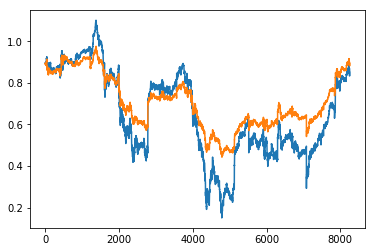

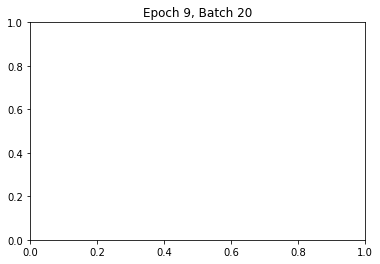

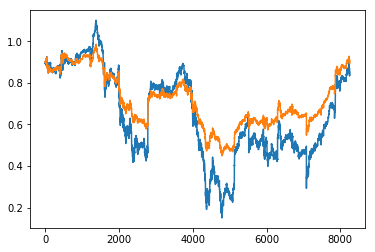

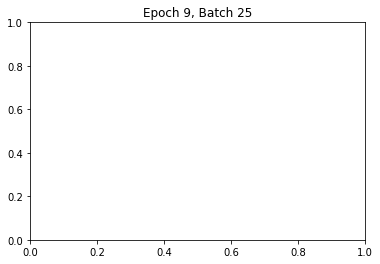

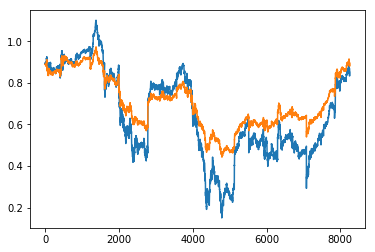

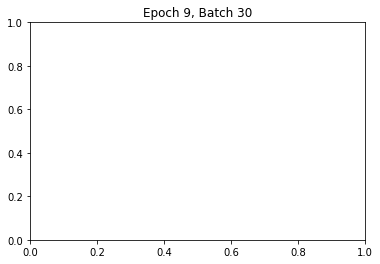

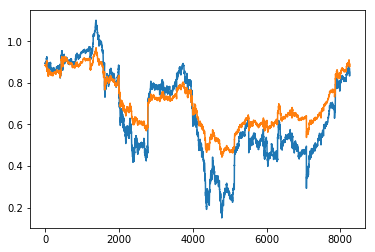

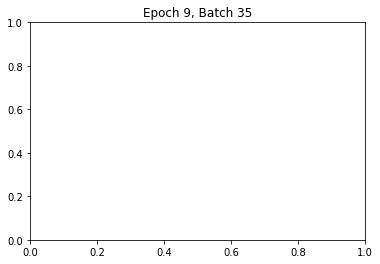

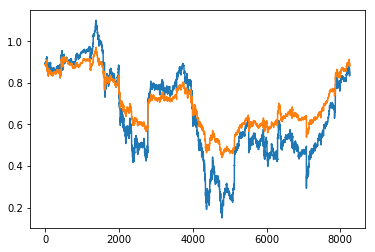

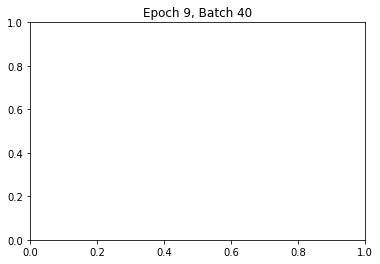

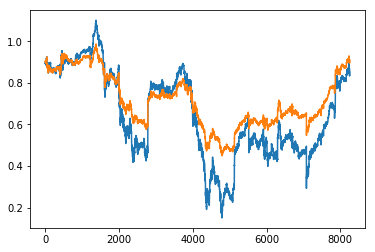

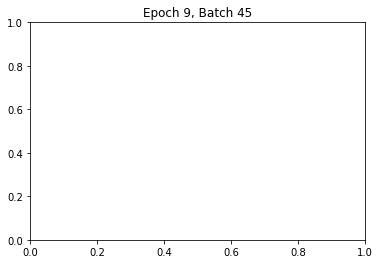

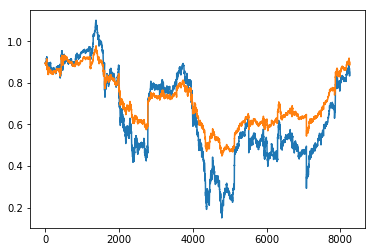

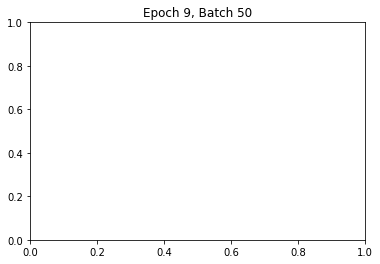

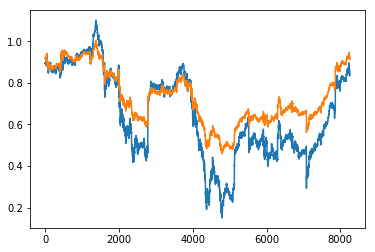

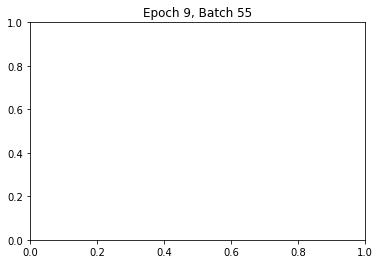

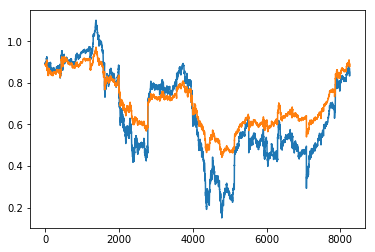

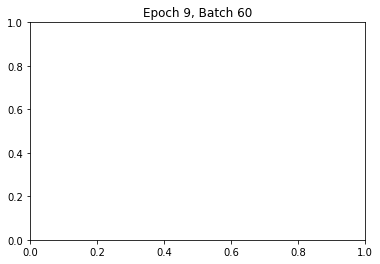

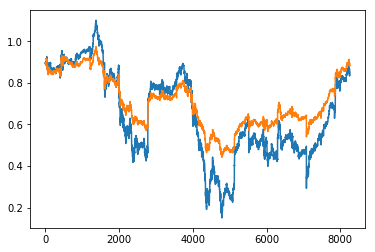

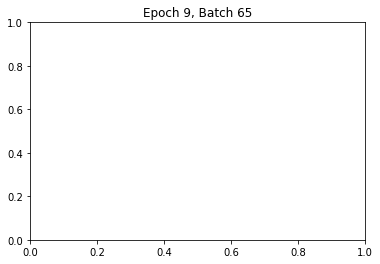

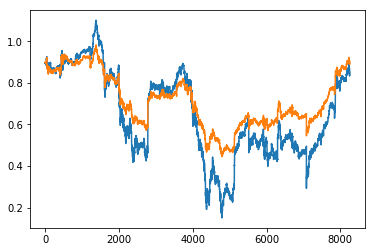

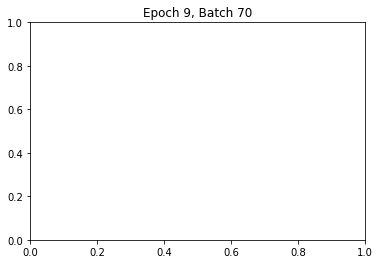

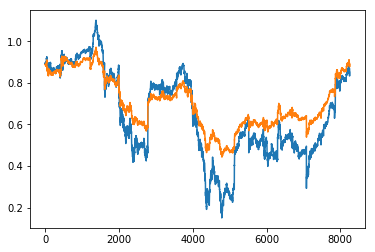

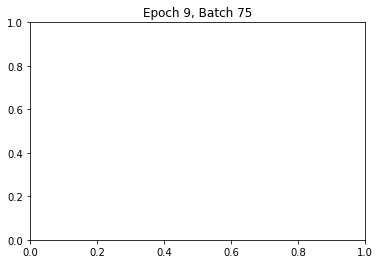

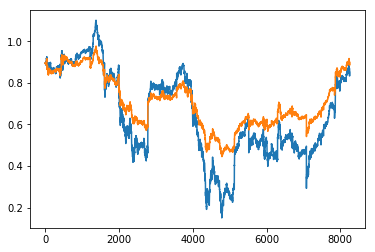

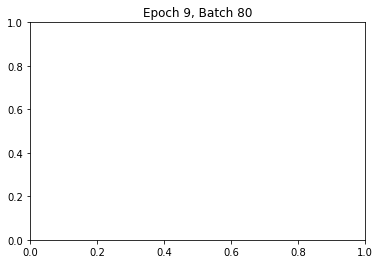

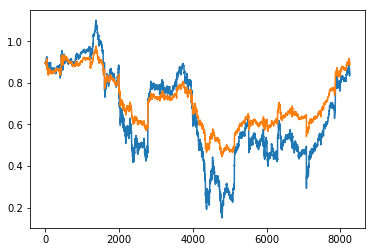

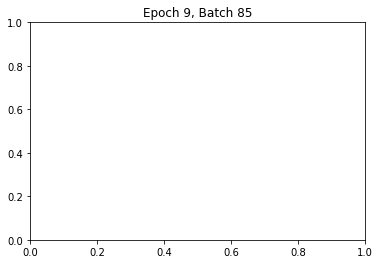

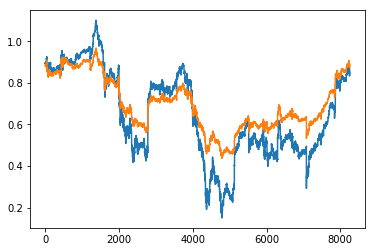

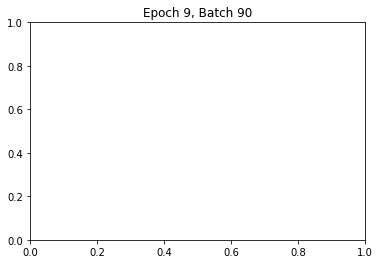

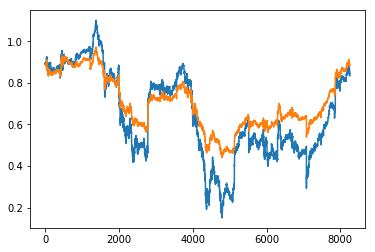

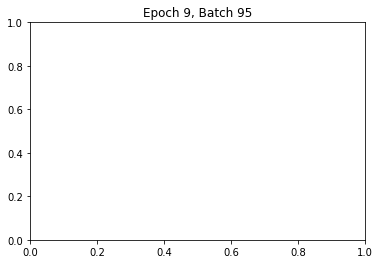

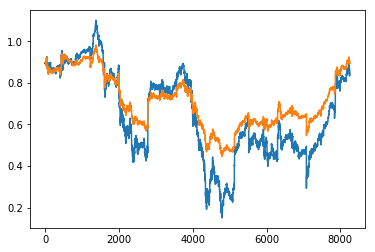

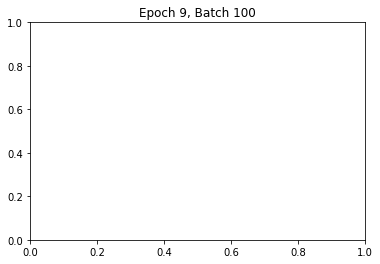

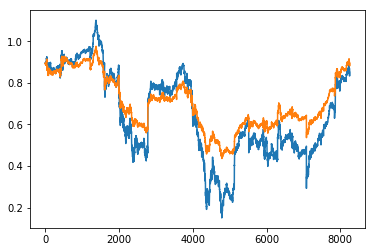

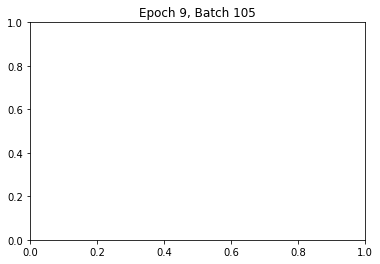

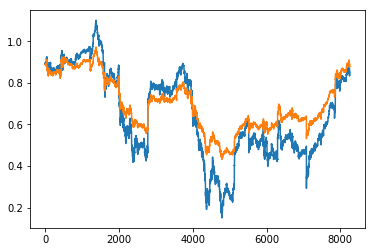

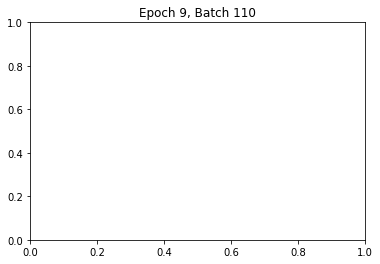

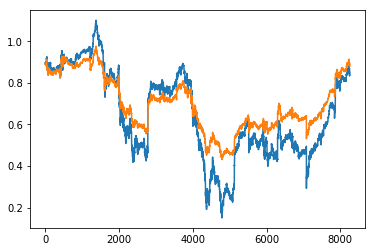

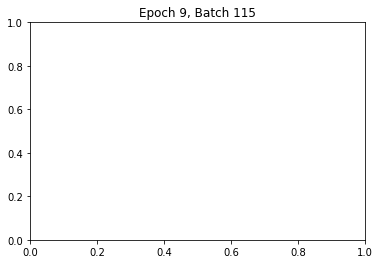

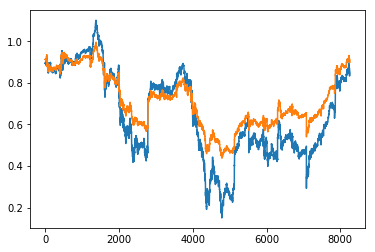

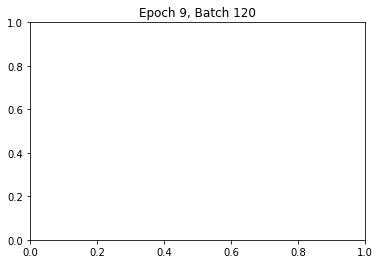

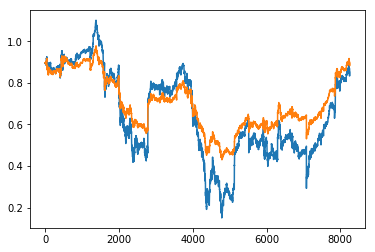

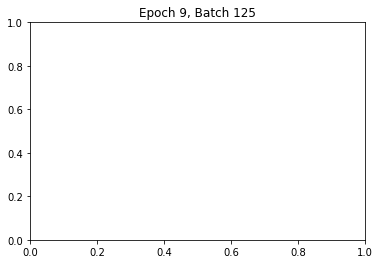

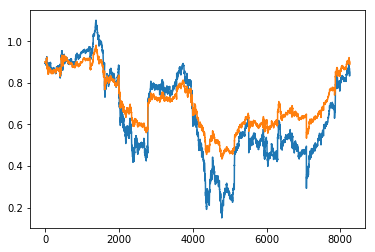

In [25]:
# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/img_epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.ion()
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            line1, = ax1.plot(y_test)
            line2, = ax1.plot(pred[0])
            plt.savefig(file_name)
            plt.show()

In [26]:
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

0.0070027104
